<a id='top'></a>

## User Engagement Analysis of Tellco Telecommunications

#### Tables of Content

<html>
    <ul>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#obj'>Objective</a></li>
        <li><a href= '#research'/>Research Questions<a/></li>
              <br/>
            <ul>
             <li><a href='#fe'>Feature Engineering</a></li>
             </ul>
            <ol>
            <li><a href='#r1'>Research Question 1</a></li>
             <li><a href='#r2'>Research Question 2</a></li>
<!--              <li><a href='#r3'>Research Question 3</a></li> -->
            </ol>
        <br/>
        <li><a href= '#ana'>Analysis<a/></li>
        <li><a href= '#go'>General Observation<a/></li>
        <li><a href= '#rc'>Recommendation & Conclusions<a/></li>
        <li><a href= '#lim'>Limitations<a/></li>
        <li><a href= '#ref'>Referecnes<a/></li>
    </ul>
</html>

<a id= 'intro'> </a>

#### Introduction

In telecommunication , tracking the user activities on the database sessions is a good starting point to appreciate the user engagement for the overall applications and per application as well.

If we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to concentrate network resources for different clusters of customers based on the engagement scores 

<a id='obj'></a>

#### Objective

The objective of this analysis is outlised as below:
    
- Track the users' engagement using the following engagement `metrics`:

- -             Sessions frequency

- -  The duration of the session

- -  The sessions total traffic (download and upload (bytes))

> Import libraries

In [654]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from  scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

<a id='research'></a>

#### Research Questions

##### Research Question 1

- Customer Aggregation

             
 1.    Aggregate the above metrics per customer id(MSISDN)  
                     
                 i  Report the top 10 customers per engagement metric

2.      Aggregat euser total traffic per application 
                    
                 i  Report the top 10 most engaged users per application 
                   
                 ii  Plot the top 3 most used applications

##### Research Question 2

- Customer Classification

             
 1. K-Means Clustering 
 
      
        i  Normalize each engagement metric & run a k-means(k=3)
                  
            to classify customers in three groups of engagement.
                          
        ii  Compute the minimum, maximum, average & total non-normalized metrics for each cluster.                        
                          
             - Visual representaiton of result and textual interpretations
             
        iii Using ​k​-means clustering algorithm:
            
            group users in k-engagement clusters based on the engagement metrics



In [655]:
path = '../datasets/cleaned/cleanWk2_data.csv'
data = pd.read_csv(path)

In [656]:
data

,bearer_id,start,start_ms,end,end_ms,imsi,msisdn_number,imei,last_location_name,avg_rtt_dl__ms_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0000,2019-04-30 06:02:33,214.00000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,2019-04-29 07:28:42,483.0000,2019-04-30 10:41:33,187.00000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,27.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0000,2019-04-30 10:46:12,810.00000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,43.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0000,2019-04-30 10:40:34,327.00000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,37.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [657]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

<a id='fe'></a>

#### Feature Engineering
 - For this analyis, we would be working with the following features

In [658]:
columns = ['bearer_id', 'msisdn_number',
           'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 
          'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_']

> Get working data

In [659]:
working_data = data[columns]

In [660]:
working_data

,bearer_id,msisdn_number,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,dur___ms__1,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,...,youtube_dl__bytes_,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_
0,13114483460844900352,3.366496e+10,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,1.823653e+09,1.545765e+06,24420.00000,1.634479e+06,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,3.368185e+10,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,1.365104e+09,1.926113e+06,7165.00000,3.493924e+06,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,3.376063e+10,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,1.361763e+09,1.684053e+06,42224.00000,8.535055e+06,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,3.375034e+10,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,1.321510e+09,6.441210e+05,13372.00000,9.023734e+06,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,3.369980e+10,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,1.089009e+09,8.626000e+05,50188.00000,6.248284e+06,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,3.365069e+10,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,8.123076e+07,3.464974e+06,52091.00000,9.967603e+06,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7349883264234609664,3.366345e+10,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,9.797070e+07,2.344568e+06,7613.00000,2.229420e+06,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,13114483573367300096,3.362189e+10,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,9.824953e+07,1.245845e+06,14394.00000,3.850890e+06,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,13114483573367300096,3.361962e+10,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,9.791063e+07,8.015470e+05,21562.00000,4.189773e+06,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [661]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   bearer_id                  150001 non-null  object 
 1   msisdn_number              150001 non-null  float64
 2   http_dl__bytes_            150001 non-null  float64
 3   http_ul__bytes_            150001 non-null  float64
 4   activity_duration_dl__ms_  150001 non-null  float64
 5   activity_duration_ul__ms_  150001 non-null  float64
 6   dur___ms__1                150001 non-null  float64
 7   social_media_dl__bytes_    150001 non-null  float64
 8   social_media_ul__bytes_    150001 non-null  float64
 9   google_dl__bytes_          150001 non-null  float64
 10  google_ul__bytes_          150001 non-null  float64
 11  email_dl__bytes_           150001 non-null  float64
 12  email_ul__bytes_           150001 non-null  float64
 13  youtube_dl__bytes_         15

<a id="r1"></a>
#### Research Question 1


`metrics`:

- -             Sessions frequency

- -  The duration of the session

- -  The sessions total traffic (download and upload (bytes))

- Customer Aggregation

             
 1.    Aggregate the above metrics per customer id(MSISDN)  
                     
                 i  Report the top 10 customers per engagement metric

2.      Aggregat user total traffic per application 
                    
                 i  Report the top 10 most engaged users per application 
                   
                 ii  Plot the top 3 most used applications

#### A

> Report the top 10 customers per engagement metric

We would start by inspecting the msisdn column

In [662]:
working_data.msisdn_number.value_counts()

3.362632e+10    1084
3.361489e+10      17
3.362578e+10      17
3.365973e+10      16
3.376054e+10      15
                ... 
3.366162e+10       1
3.365868e+10       1
3.366778e+10       1
3.361812e+10       1
3.362668e+10       1
Name: msisdn_number, Length: 106856, dtype: int64

In [663]:
working_data.msisdn_number.isnull().any()

False

In [664]:
"" in working_data.msisdn_number

False

> convert msisdn number to string datatype

In [665]:
 working_data = working_data.astype({'msisdn_number':'str'})

In [666]:
working_data.dtypes

bearer_id                     object
msisdn_number                 object
http_dl__bytes_              float64
http_ul__bytes_              float64
activity_duration_dl__ms_    float64
activity_duration_ul__ms_    float64
dur___ms__1                  float64
social_media_dl__bytes_      float64
social_media_ul__bytes_      float64
google_dl__bytes_            float64
google_ul__bytes_            float64
email_dl__bytes_             float64
email_ul__bytes_             float64
youtube_dl__bytes_           float64
youtube_ul__bytes_           float64
netflix_dl__bytes_           float64
netflix_ul__bytes_           float64
gaming_dl__bytes_            float64
gaming_ul__bytes_            float64
other_dl__bytes_             float64
other_ul__bytes_             float64
total_ul__bytes_             float64
total_dl__bytes_             float64
dtype: object

> group each metric by users msisdn number

1. Group by `session frequency`

In [667]:
sess_fre = working_data.groupby('msisdn_number')['bearer_id'].count().reset_index(name='session_fre').sort_values('session_fre', ascending = False)

In [668]:
sess_fre.head()

,msisdn_number,session_fre
13527,33626320676.0,1084
6438,33614892860.0,17
13181,33625779332.0,17
37053,33659725664.0,16
92925,33760536639.0,15


2. Grouo by `session duration`

In [669]:
sess_dur = working_data.groupby('msisdn_number')['dur___ms__1'].sum().reset_index(name='session_dur').sort_values('session_dur', ascending = False)

In [670]:
sess_dur

,msisdn_number,session_dur
13527,33626320676.0,8.134348e+10
13181,33625779332.0,1.855376e+10
6438,33614892860.0,9.966906e+09
92925,33760536639.0,9.279442e+09
65119,33667163239.0,8.744922e+09
...,...,...
24742,33650431620.0,7.267018e+06
85147,33698390293.0,7.258080e+06
35288,33659328207.0,7.189000e+06
60768,33665660120.0,7.146574e+06


> We have to convert the session duration to hours, so our interpreations can be more clear after analysis

In [671]:
sess_dur.session_dur=sess_dur.session_dur.apply(lambda x: int(x/(1000*60*60)%24))

In [672]:
sess_dur.rename(columns={'session_dur':'session_dur_hours'}, inplace=True)

In [673]:
sess_dur

,msisdn_number,session_dur_hours
13527,33626320676.0,11
13181,33625779332.0,17
6438,33614892860.0,8
92925,33760536639.0,9
65119,33667163239.0,5
...,...,...
24742,33650431620.0,2
85147,33698390293.0,2
35288,33659328207.0,1
60768,33665660120.0,1


3. Group by session `total traffic`

In [674]:
working_data['total_traffic_bytes'] = working_data.total_dl__bytes_ + working_data.total_ul__bytes_

In [675]:
working_data.total_traffic_bytes

0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957646e+08
Name: total_traffic_bytes, Length: 150001, dtype: float64

In [676]:
sess_trfc = working_data.groupby('msisdn_number')['total_traffic_bytes'].sum().reset_index(name='session_trfc').sort_values('session_trfc', ascending = False)

In [677]:
sess_trfc

,msisdn_number,session_trfc
13527,33626320676.0,5.397159e+11
6438,33614892860.0,8.846226e+09
92925,33760536639.0,8.514774e+09
13181,33625779332.0,8.499621e+09
76364,33675877202.0,7.891111e+09
...,...,...
76162,33675475328.0,3.802236e+07
104771,33782507973.0,3.792924e+07
63658,33666684512.0,3.399962e+07
43678,33661319633.0,3.357584e+07


> For the purpose of our analytics, we would convert bytes figure of total_traffic to megabytes

In [678]:
sess_trfc.session_trfc=sess_trfc.session_trfc.apply(lambda x : round((x/1024)/1024,4))

In [679]:
sess_trfc

,msisdn_number,session_trfc
13527,33626320676.0,514713.1696
6438,33614892860.0,8436.4190
92925,33760536639.0,8120.3212
13181,33625779332.0,8105.8700
76364,33675877202.0,7525.5495
...,...,...
76162,33675475328.0,36.2609
104771,33782507973.0,36.1721
63658,33666684512.0,32.4246
43678,33661319633.0,32.0204


> merge all metrics to a single metrics table

In [680]:
agg_metrics = sess_dur.merge(sess_fre,on='msisdn_number').merge(sess_trfc, on='msisdn_number')

In [681]:
agg_metrics

,msisdn_number,session_dur_hours,session_fre,session_trfc
0,33626320676.0,11,1084,514713.1696
1,33625779332.0,17,17,8105.8700
2,33614892860.0,8,17,8436.4190
3,33760536639.0,9,15,8120.3212
4,33667163239.0,5,13,5358.1181
...,...,...,...,...
106851,33650431620.0,2,1,199.2166
106852,33698390293.0,2,1,797.9008
106853,33659328207.0,1,1,266.8424
106854,33665660120.0,1,1,647.0846


> from the metrics aggregation table, we can perform various analysis

>> Top 10 customers per engagement metric

- Top 10 customers per sessions frequency 

In [682]:
top10_fre = agg_metrics.sort_values(by='session_fre', ascending=False).head(10)

In [683]:
top10_fre

,msisdn_number,session_dur_hours,session_fre,session_trfc
0,33626320676.0,11,1084,514713.1696
1,33625779332.0,17,17,8105.8700
2,33614892860.0,8,17,8436.4190
24,33659725664.0,16,16,7348.8834
15,33675877202.0,7,15,7525.5495
3,33760536639.0,9,15,8120.3212
4,33667163239.0,5,13,5358.1181
23,33786323068.0,23,12,5361.7778
7,33603127838.0,18,12,4745.6694
9,33760413819.0,14,12,6801.9586


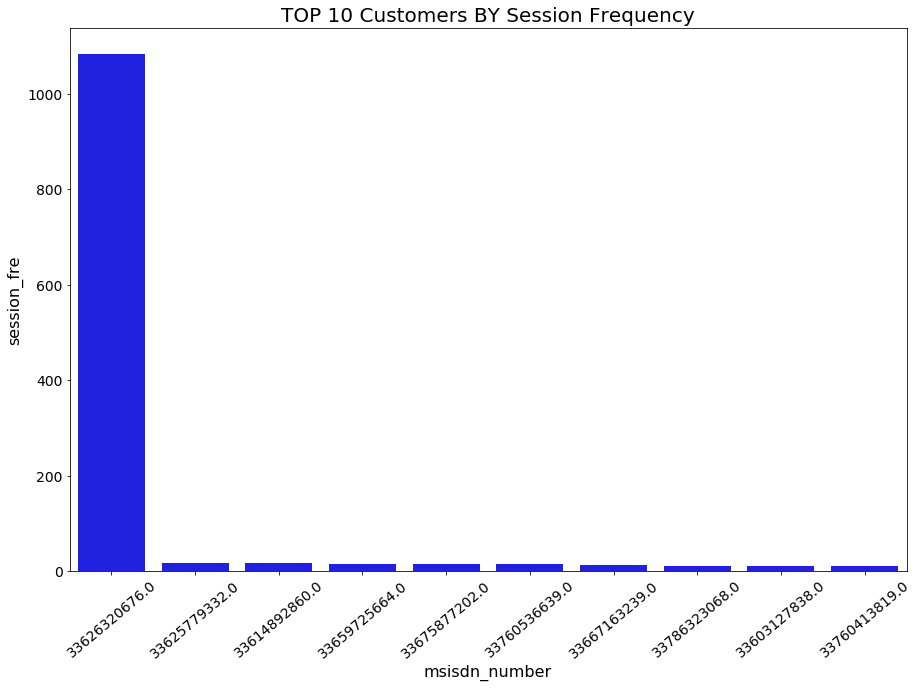

In [684]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MSISDN Number', fontsize=16)
plt.ylabel('Session Frequency', fontsize=16)
plt.title('TOP 10 Customers BY Session Frequency', fontsize=20)
sns.barplot(x='msisdn_number', y= 'session_fre', data=top10_fre, color='b', order=top10_fre.msisdn_number.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/top10CustSessionFreq.png', format='png')
plt.show()

> The customer with MSISDN number `33626320676` has an outsized (outlier) positive difference from the average session frequency of the top ten.

- Top 10 customers per session deuration 

In [685]:
top10_dur = agg_metrics.sort_values(by='session_dur_hours', ascending=False).head(10)

In [686]:
top10_dur

,msisdn_number,session_dur_hours,session_fre,session_trfc
69463,33667272961.0,23,1,715.8508
72436,33633593418.0,23,1,104.3614
72438,33665097776.0,23,1,594.9764
72439,33665241484.0,23,1,333.0692
72440,33668042361.0,23,1,840.4487
72441,33661795703.0,23,1,221.7685
72442,33699658673.0,23,1,737.3270
72443,33659405119.0,23,1,669.2060
72444,33667790686.0,23,1,666.4738
72445,33668505689.0,23,1,158.4064


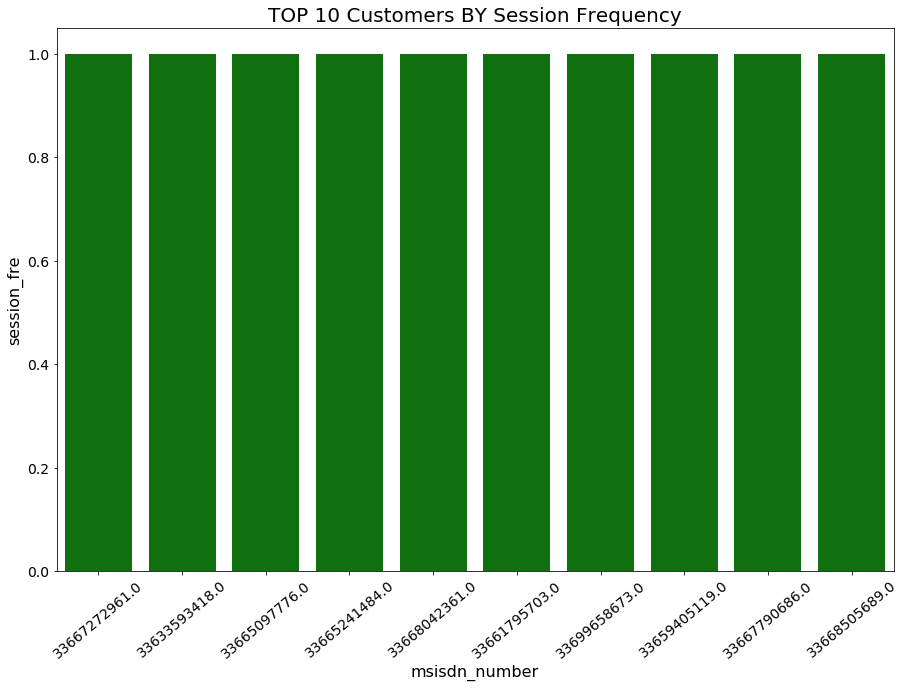

In [687]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MSISDN Number', fontsize=16)
plt.ylabel('Session Frequency', fontsize=16)
plt.title('TOP 10 Customers BY Session Frequency', fontsize=20)
sns.barplot(x='msisdn_number', y= 'session_fre', data=top10_dur, color='g', order=top10_dur.msisdn_number.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/top10CustSessionFreq.png', format='png')
plt.show()

> All top 10 customers by session duration in hours have the spent approximately the same number of hours on Data Sessions

> Howveer, further investigation reveals that we actaully have over twn customer s who have spent 23 hours on xDR sessions

> A value counts of hours in session durations reveals this

In [688]:
agg_metrics.session_dur_hours.value_counts()

23    17706
0      7150
3      5179
4      4907
5      4408
7      4284
8      4274
2      4266
6      4094
9      4015
1      3879
10     3737
22     3655
11     3614
13     3467
16     3336
15     3323
12     3317
14     3305
21     3288
17     3159
18     2916
20     2871
19     2706
Name: session_dur_hours, dtype: int64

> Lets visualize this

In [689]:
sess_dur_counts = agg_metrics.session_dur_hours.value_counts().sort_values(ascending=False).reset_index(name='customer counts')

In [690]:
sess_dur_counts.rename(columns={"index":'hours'}, inplace=True)

In [691]:
sess_dur_counts

,hours,customer counts
0,23,17706
1,0,7150
2,3,5179
3,4,4907
4,5,4408
5,7,4284
6,8,4274
7,2,4266
8,6,4094
9,9,4015


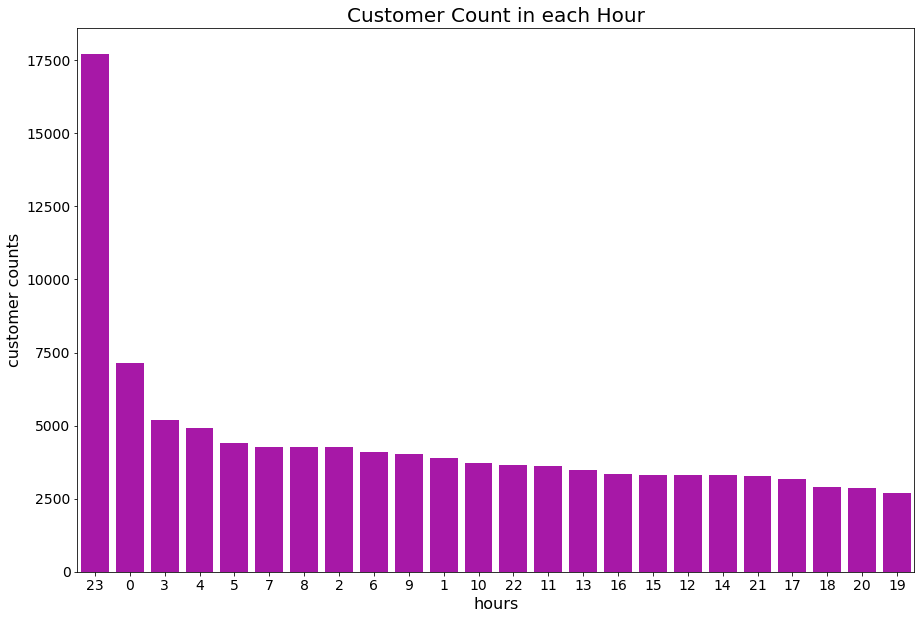

In [692]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Hours', fontsize=16)
plt.ylabel('Customer Count', fontsize=16)
plt.title('Customer Count in each Hour', fontsize=20)
sns.barplot(x='hours', y= 'customer counts', data=sess_dur_counts, color='m', order=sess_dur_counts.hours.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/SessionDurCounts.png', format='png')
plt.show()

> From the above we can see that our top customers by session duration are actrually `18,537 customers`

> This is quite significant as it is indicative growth in patronage

- Top 10 customers per sessions traffic 

In [693]:
top10_trfc = agg_metrics.sort_values(by='session_trfc', ascending=False).head(10)

In [694]:
top10_trfc

,msisdn_number,session_dur_hours,session_fre,session_trfc
0,33626320676.0,11,1084,514713.1696
2,33614892860.0,8,17,8436.4190
3,33760536639.0,9,15,8120.3212
1,33625779332.0,17,17,8105.8700
15,33675877202.0,7,15,7525.5495
24,33659725664.0,16,16,7348.8834
19,33666464084.0,12,11,6969.9296
9,33760413819.0,14,12,6801.9586
46,33664712899.0,21,11,6553.6673
12,33698792269.0,19,11,6237.8875


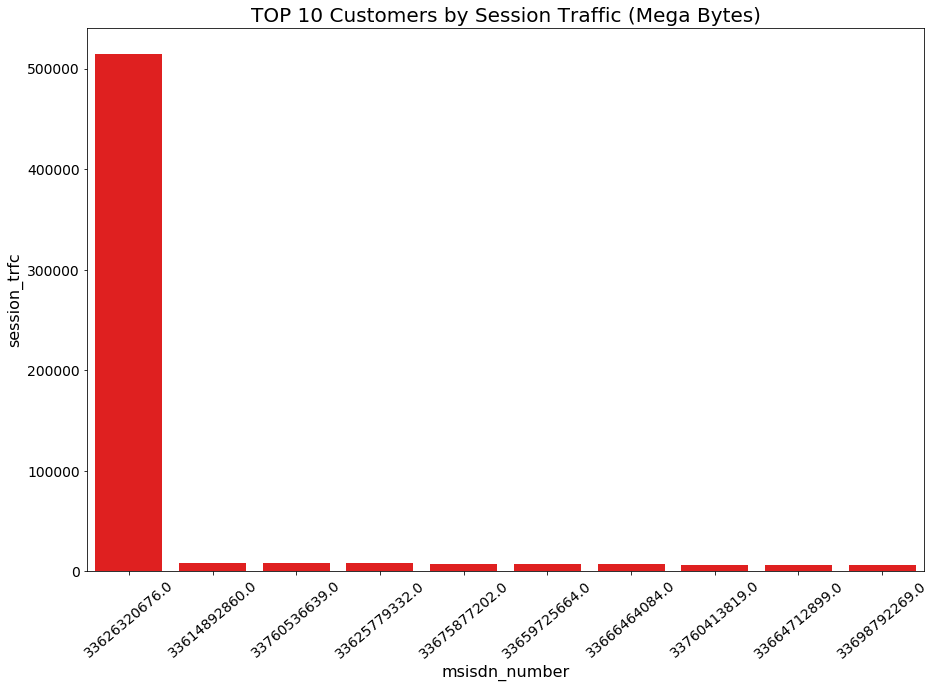

In [695]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('MSISDN Number', fontsize=16)
plt.ylabel('Session Traffic', fontsize=16)
plt.title('TOP 10 Customers by Session Traffic (Mega Bytes)', fontsize=20)
sns.barplot(x='msisdn_number', y= 'session_trfc', data=top10_trfc, color='r', order=top10_trfc.msisdn_number.values.tolist())
# save chart
plt.savefig(fname='visuals/user_engagement/top10CustSessTrfc.png', format='png')
plt.show()

> Just like in the case of session frequency, the customer with MSISDN number `33626320676` has an outsized (outlier) positive difference from the average session traffic of the top ten.

> We can take a step further in trying to understand why this is the case by calculating the correaltion between session frequency and session traffic

In [696]:
trfc_frq = agg_metrics[['session_fre','session_trfc']]
trfc_frq

,session_fre,session_trfc
0,1084,514713.1696
1,17,8105.8700
2,17,8436.4190
3,15,8120.3212
4,13,5358.1181
...,...,...
106851,1,199.2166
106852,1,797.9008
106853,1,266.8424
106854,1,647.0846


In [697]:
trfc_frq_corr = trfc_frq.corr()
trfc_frq_corr.iloc[1,0]

0.9857979640699795

> From the above, we can see that there is a `strong positive correlaion between session frequency and session traffic`

> Let's visualize this

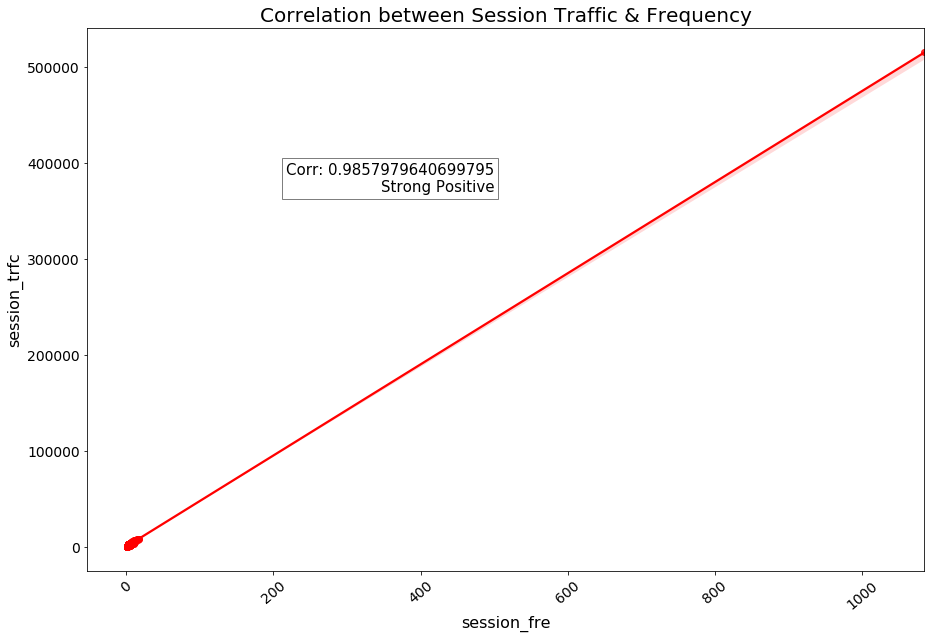

In [698]:
plt.subplots(figsize=(15,10))
plt.xticks(rotation=40, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Session Frequency', fontsize=16)
plt.ylabel('Session Traffic', fontsize=16)
plt.title('Correlation between Session Traffic & Frequency', fontsize=20)
sns.regplot(data=trfc_frq, y='session_trfc', x='session_fre', scatter=True, color='r')
plt.text(500, 400000, s= f'Corr: {trfc_frq_corr.iloc[1,0]}\nStrong Positive', fontsize=15,
         horizontalalignment='right',
         bbox=dict(facecolor='w', alpha=0.5),
         verticalalignment='top')
plt.savefig(fname='visuals/user_engagement/sessFrqTrfcCorr.png', format='png')
plt.show()

####  Let's plot a correlation matrix for all metrics

In [699]:
agg_metrics_corr = agg_metrics.corr()

In [700]:
agg_metrics_corr

,session_dur_hours,session_fre,session_trfc
session_dur_hours,1.000000,0.012128,0.011891
session_fre,0.012128,1.000000,0.985798
session_trfc,0.011891,0.985798,1.000000


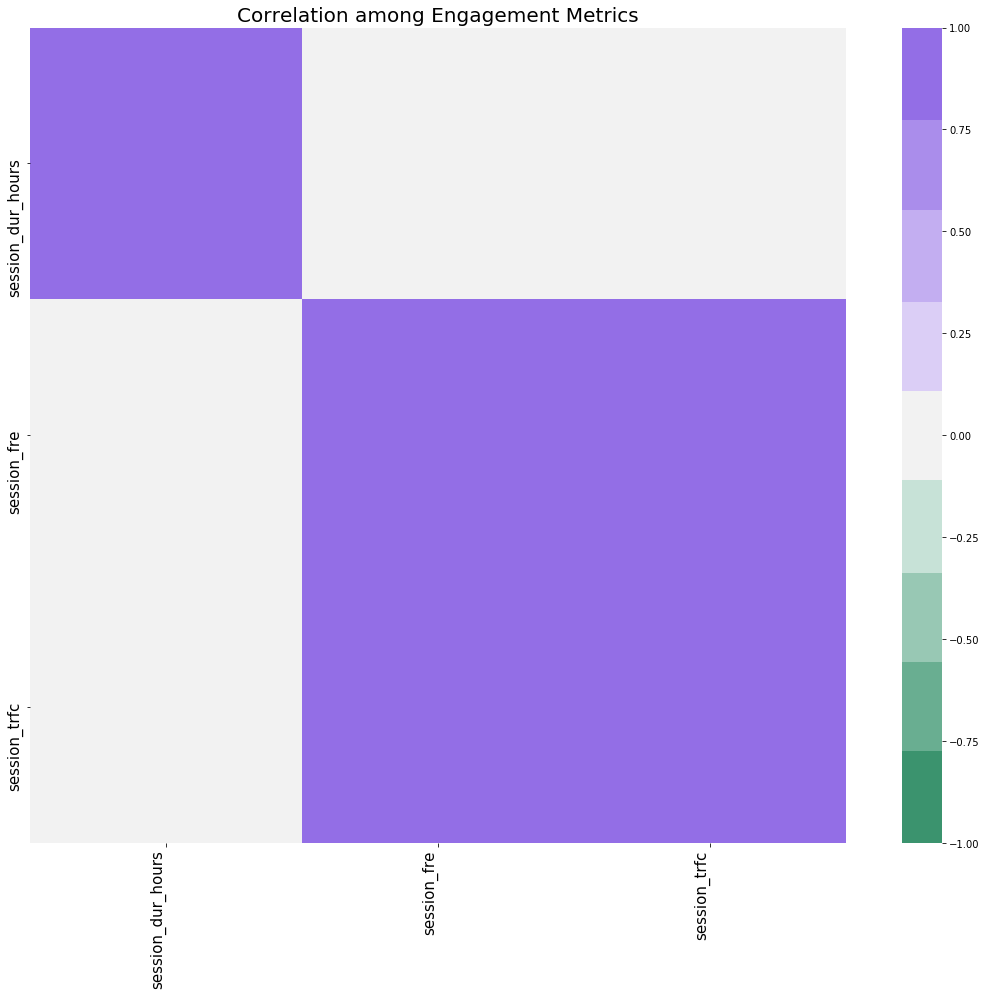

In [701]:
plt.subplots(figsize=(20, 15))
plt.title('Correlation among Engagement Metrics', fontsize=20)
ax = sns.heatmap(
    agg_metrics_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig(format='png', fname='visuals/user_engagement/aggMatrixCorr.png')
plt.show()

#### Interpretation

> 1. There is very little or no correlation between session duration (hours) and any of the other metrics

> 2. There is  a strong positive correlation between session frequency and session traffic

>> This means that an increase in session frequency is highly likely to lead to increase in session traffic

#### B

> Report the top 10 most engaged users per application 
                   
> Plot the top 3 most used applications

In [702]:
working_data

,bearer_id,msisdn_number,http_dl__bytes_,http_ul__bytes_,activity_duration_dl__ms_,activity_duration_ul__ms_,dur___ms__1,social_media_dl__bytes_,social_media_ul__bytes_,google_dl__bytes_,...,youtube_ul__bytes_,netflix_dl__bytes_,netflix_ul__bytes_,gaming_dl__bytes_,gaming_ul__bytes_,other_dl__bytes_,other_ul__bytes_,total_ul__bytes_,total_dl__bytes_,total_traffic_bytes
0,13114483460844900352,33664962239.0,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,1.823653e+09,1.545765e+06,24420.00000,1.634479e+06,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,3.456294e+08
1,13114483482878900224,33681854413.0,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,1.365104e+09,1.926113e+06,7165.00000,3.493924e+06,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,7.071854e+08
2,13114483484080500736,33760627129.0,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,1.361763e+09,1.684053e+06,42224.00000,8.535055e+06,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,3.076910e+08
3,13114483485442799616,33750343200.0,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,1.321510e+09,6.441210e+05,13372.00000,9.023734e+06,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,8.893527e+08
4,13114483499480700928,33699795932.0,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,1.089009e+09,8.626000e+05,50188.00000,6.248284e+06,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,6.076814e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,33650688697.0,1.144710e+08,3.242301e+06,4.237600e+04,4.191500e+04,8.123076e+07,3.464974e+06,52091.00000,9.967603e+06,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,6.318041e+08
149997,7349883264234609664,33663449963.0,1.144710e+08,3.242301e+06,1.726400e+04,1.675900e+04,9.797070e+07,2.344568e+06,7613.00000,2.229420e+06,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,7.057839e+08
149998,13114483573367300096,33621890103.0,1.144710e+08,3.242301e+06,2.500300e+04,2.864000e+04,9.824953e+07,1.245845e+06,14394.00000,3.850890e+06,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,6.276986e+08
149999,13114483573367300096,33619622058.0,1.144710e+08,3.242301e+06,1.340500e+04,3.408800e+04,9.791063e+07,8.015470e+05,21562.00000,4.189773e+06,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,4.015220e+08


In [703]:
working_data.columns

Index(['bearer_id', 'msisdn_number', 'http_dl__bytes_', 'http_ul__bytes_',
       'activity_duration_dl__ms_', 'activity_duration_ul__ms_', 'dur___ms__1',
       'social_media_dl__bytes_', 'social_media_ul__bytes_',
       'google_dl__bytes_', 'google_ul__bytes_', 'email_dl__bytes_',
       'email_ul__bytes_', 'youtube_dl__bytes_', 'youtube_ul__bytes_',
       'netflix_dl__bytes_', 'netflix_ul__bytes_', 'gaming_dl__bytes_',
       'gaming_ul__bytes_', 'other_dl__bytes_', 'other_ul__bytes_',
       'total_ul__bytes_', 'total_dl__bytes_', 'total_traffic_bytes'],
      dtype='object')

Report the top 10 most engaged users per application 

In [704]:
apps = pd.DataFrame()

`NB`: I would be converting bytes to megabytes

In [705]:
apps['bearer_id'] = working_data['bearer_id']
apps['msisdn_number'] = working_data['msisdn_number']
apps['social_media(mb)'] = round(((working_data.social_media_dl__bytes_ + working_data.social_media_ul__bytes_)/1024)/1024,4)
apps['google(mb)'] = round(((working_data.google_dl__bytes_ + working_data.google_ul__bytes_)/1024)/1024,4)
apps['email(mb)'] = round(((working_data.email_dl__bytes_ + working_data.email_ul__bytes_)/1024)/1024,4)
apps['youtube(mb)'] = round(((working_data.youtube_dl__bytes_ + working_data.youtube_ul__bytes_)/1024)/1024,4)
apps['netflix(mb)'] = round(((working_data.netflix_dl__bytes_ + working_data.netflix_ul__bytes_)/1024)/1024,4)
apps['gaming(mb)'] = round(((working_data.gaming_dl__bytes_ + working_data.gaming_ul__bytes_)/1024)/1024,4)
apps['other(mb)'] = round(((working_data.other_dl__bytes_ + working_data.other_ul__bytes_)/1024)/1024,4) 
apps['total_traffic(mb)'] = round(((working_data.total_traffic_bytes)/1024)/1024,4)
# convert duration from millisecond to hour
apps['duration (hrs)'] = round(((working_data.dur___ms__1)/1024)/1024,4)

In [706]:
apps

,bearer_id,msisdn_number,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb),total_traffic(mb),duration (hrs)
0,13114483460844900352,33664962239.0,1.4974,2.7713,3.5298,17.5056,17.0280,278.8796,172.1943,329.6179,1739.1709
1,13114483482878900224,33681854413.0,1.8437,4.2096,0.8940,37.5358,33.9179,581.6658,516.8527,674.4245,1301.8650
2,13114483484080500736,33760627129.0,1.6463,9.7552,3.2073,32.8305,22.6509,219.3263,395.6874,293.4370,1298.6781
3,13114483485442799616,33750343200.0,0.6270,11.2646,1.9750,34.8423,14.3934,772.8461,726.5446,848.1529,1260.2898
4,13114483499480700928,33699795932.0,0.8705,7.3899,2.0126,32.6369,16.7273,506.6271,538.4634,579.5301,1038.5603
...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,33650688697.0,3.3541,12.1926,0.6589,26.6601,35.8218,510.9853,15.9759,602.5354,77.4677
149997,7349883264234609664,33663449963.0,2.2432,4.2108,2.0234,21.1387,38.7605,602.3675,681.5320,673.0880,93.4321
149998,13114483573367300096,33621890103.0,1.2019,6.2804,1.9629,23.3807,14.3334,540.6702,126.2813,598.6201,93.6981
149999,13114483573367300096,33619622058.0,0.7850,7.3979,2.7188,16.3293,15.7307,338.6178,778.3127,382.9212,93.3749


> Social Media

In [707]:
social_media_users = apps.groupby('msisdn_number')['social_media(mb)'].sum().reset_index(name='social_traffic')

In [708]:
social_media_users

,msisdn_number,social_traffic
0,3197020876596.0,0.6821
1,33601001722.0,2.1287
2,33601001754.0,2.5373
3,33601002511.0,3.0476
4,33601007832.0,0.2673
...,...,...
106851,33789967113.0,1.3479
106852,33789980299.0,4.0534
106853,33789996170.0,0.2863
106854,33789997247.0,0.4755


> merge aggregation metrics

In [709]:
social_media_users = social_media_users.merge(agg_metrics, on='msisdn_number').sort_values(by='social_traffic', ascending=False)

In [710]:
social_media_users.head(10)

,msisdn_number,social_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,1923.7432,11,1084,514713.1696
92925,33760536639.0,37.9404,9,15,8120.3212
37053,33659725664.0,33.7715,16,16,7348.8834
6438,33614892860.0,26.9837,8,17,8436.4190
13181,33625779332.0,25.8784,17,17,8105.8700
65119,33667163239.0,23.1245,5,13,5358.1181
106139,33786323068.0,22.8642,23,12,5361.7778
70961,33669068942.0,22.6981,1,11,3725.5690
667,33603127838.0,22.0088,18,12,4745.6694
31332,33658490784.0,21.9346,10,9,2565.5164


In [711]:
top10_socialMedia_users = social_media_users.head(10)

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten social media users, I wil log(normalise) the social traffic

In [712]:
top10_socialMedia_users.social_traffic = np.log(top10_socialMedia_users.social_traffic)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


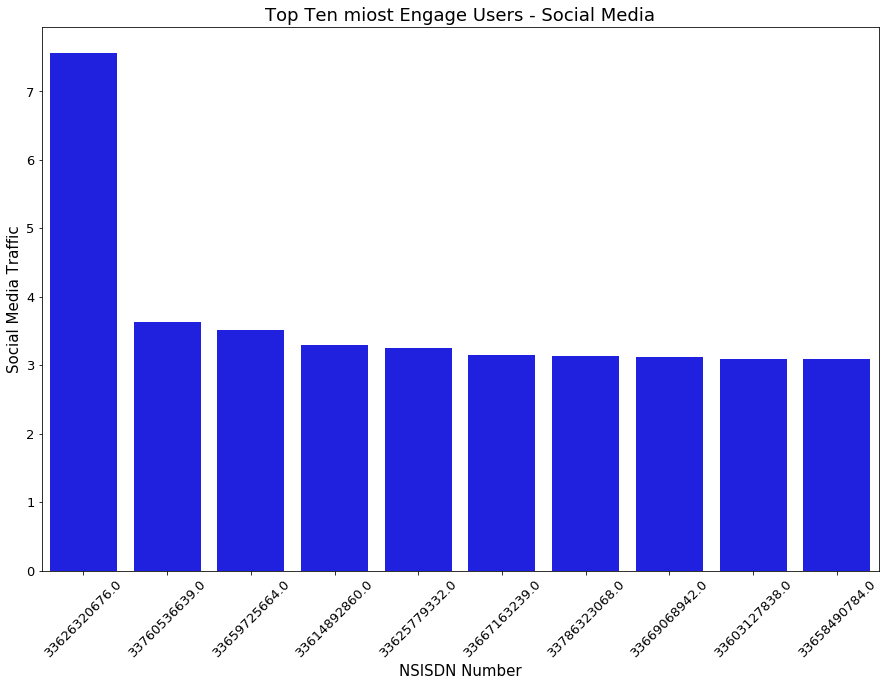

In [713]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_socialMedia_users, x='msisdn_number', y='social_traffic', color='b',
           order=top10_socialMedia_users.msisdn_number.values.tolist())
plt.title("Top Ten miost Engage Users - Social Media", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Social Media Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenSocialMedia.png", format="png")
plt.show()

In [714]:
social_media_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=social_media_users.head(10))

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten social media users enagagement, I wil log(normalise) the value figures

In [715]:
social_media_agg.value = np.log(social_media_agg.value)

In [716]:
social_media_agg = social_media_agg.sort_values(by='msisdn_number')

In [717]:
social_media_agg.rename(columns={'value':'value(log)'}, inplace=True)

In [718]:
social_media_agg

,msisdn_number,metrics,value(log)
18,33603127838.0,session_fre,2.484907
28,33603127838.0,session_trfc,8.464988
8,33603127838.0,session_dur_hours,2.890372
23,33614892860.0,session_trfc,9.040313
3,33614892860.0,session_dur_hours,2.079442
13,33614892860.0,session_fre,2.833213
14,33625779332.0,session_fre,2.833213
24,33625779332.0,session_trfc,9.000344
4,33625779332.0,session_dur_hours,2.833213
20,33626320676.0,session_trfc,13.151365


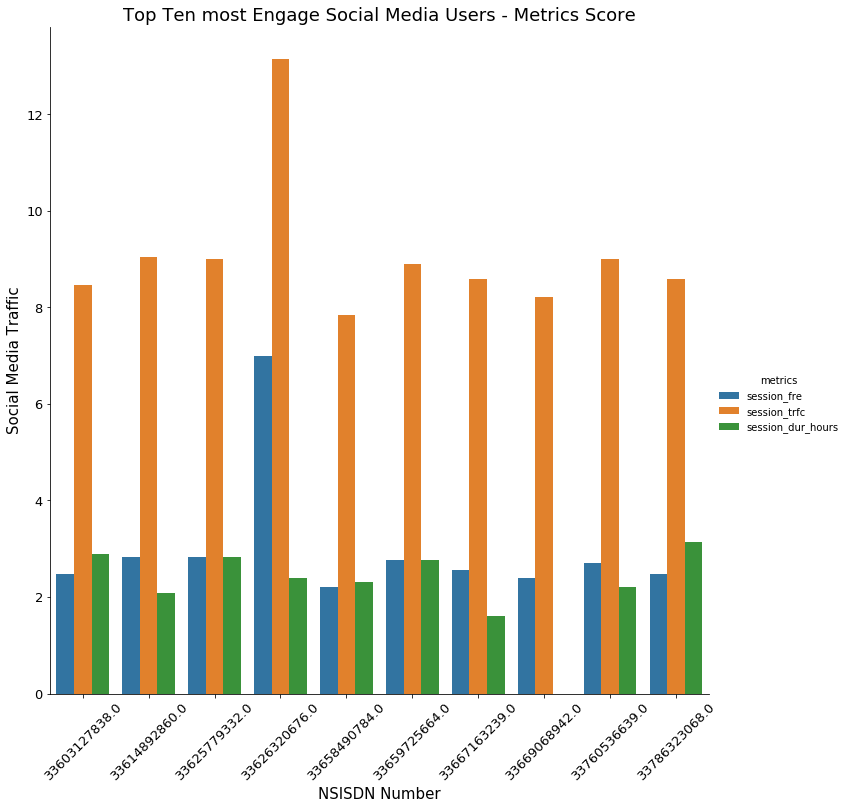

In [719]:
sns.catplot(data=social_media_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar',
    aspect=1,)
plt.title("Top Ten most Engage Social Media Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Social Media Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenSocialMedia2.png", format="png")
plt.show()

- #### Interpretation

> From the above, we can observe that there is high session traffic engagement among the top ten social media users compared to other enagagement metric

> Google

In [720]:
google_users = apps.groupby('msisdn_number')['google(mb)'].sum().reset_index(name='google_traffic')

In [721]:
google_users

,msisdn_number,google_traffic
0,3197020876596.0,9.9551
1,33601001722.0,4.1857
2,33601001754.0,5.0877
3,33601002511.0,3.2836
4,33601007832.0,9.2301
...,...,...
106851,33789967113.0,9.4346
106852,33789980299.0,9.7718
106853,33789996170.0,7.1824
106854,33789997247.0,5.1782


> merge aggregation metrics

In [722]:
google_users = google_users.merge(agg_metrics, on='msisdn_number').sort_values(by='google_traffic', ascending=False)

In [723]:
google_users.head(10)

,msisdn_number,google_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,8011.5972,11,1084,514713.1696
13181,33625779332.0,135.7155,17,17,8105.8700
6438,33614892860.0,122.0453,8,17,8436.4190
92925,33760536639.0,117.5150,9,15,8120.3212
37053,33659725664.0,111.1187,16,16,7348.8834
106139,33786323068.0,105.1470,23,12,5361.7778
76364,33675877202.0,104.7710,7,15,7525.5495
65119,33667163239.0,100.1669,5,13,5358.1181
94656,33761268199.0,92.5924,7,10,4817.1181
86314,33698756430.0,87.6762,20,10,5600.2259


In [724]:
top10_google_users = google_users.head(10)

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten google users, I wil log(normalise) the google traffic

In [725]:
top10_google_users.google_traffic = np.log(top10_google_users.google_traffic)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


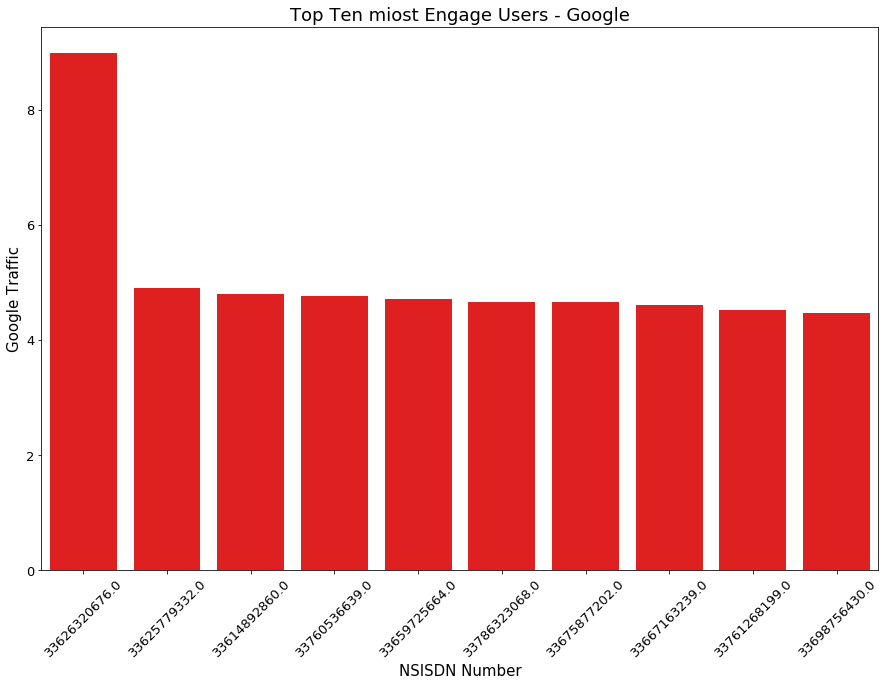

In [726]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_google_users, x='msisdn_number', y='google_traffic', color='r', 
            order=top10_google_users.msisdn_number.values.tolist())
plt.title("Top Ten miost Engage Users - Google", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Google Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenGoogle.png", format="png")
plt.show()

In [727]:
google_users

,msisdn_number,google_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,8.988645,11,1084,514713.1696
13181,33625779332.0,4.910561,17,17,8105.8700
6438,33614892860.0,4.804392,8,17,8436.4190
92925,33760536639.0,4.766566,9,15,8120.3212
37053,33659725664.0,4.710599,16,16,7348.8834
...,...,...,...,...,...
94767,33761321476.0,0.107500,7,1,219.7156
72307,33669526270.0,0.107400,12,1,212.6710
75414,33674088978.0,0.095200,17,1,264.0004
84067,33698001031.0,0.085700,22,1,396.7003


In [728]:
google_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=google_users.head(10))

In [729]:
google_agg

,msisdn_number,metrics,value
0,33626320676.0,session_dur_hours,11.0000
1,33625779332.0,session_dur_hours,17.0000
2,33614892860.0,session_dur_hours,8.0000
3,33760536639.0,session_dur_hours,9.0000
4,33659725664.0,session_dur_hours,16.0000
5,33786323068.0,session_dur_hours,23.0000
6,33675877202.0,session_dur_hours,7.0000
7,33667163239.0,session_dur_hours,5.0000
8,33761268199.0,session_dur_hours,7.0000
9,33698756430.0,session_dur_hours,20.0000


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten users enagagement, I wil log(normalise) the value figures

In [730]:
google_agg.value = np.log(google_agg.value)

In [731]:
google_agg = google_agg.sort_values(by='msisdn_number')

In [732]:
google_agg.rename(columns={'value':'value(log)'}, inplace=True)

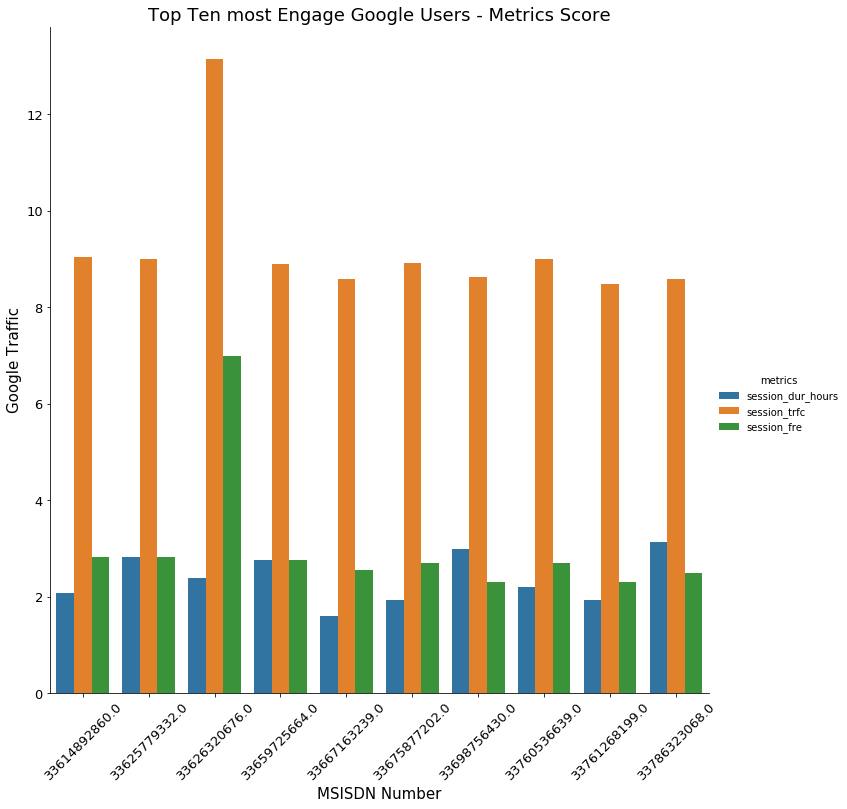

In [733]:
sns.catplot(data=google_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Google Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Google Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenGoogle2.png", format="png")
plt.show()

- #### Interpretation

> From the above, we can observe that there is high session traffic engagement among the top ten of this appplication users compared to other enagagement metric

> Email

In [734]:
email_users = apps.groupby('msisdn_number')['email(mb)'].sum().reset_index(name='email_traffic')

In [735]:
email_users

,msisdn_number,email_traffic
0,3197020876596.0,1.4503
1,33601001722.0,1.2697
2,33601001754.0,3.1545
3,33601002511.0,3.0569
4,33601007832.0,2.1788
...,...,...
106851,33789967113.0,3.2393
106852,33789980299.0,5.0691
106853,33789996170.0,0.9603
106854,33789997247.0,2.3976


> merge aggregation metrics

In [736]:
email_users = email_users.merge(agg_metrics, on='msisdn_number').sort_values(by='email_traffic', ascending=False)

In [737]:
email_users.head(10)

,msisdn_number,email_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,2329.1592,11,1084,514713.1696
6438,33614892860.0,38.8990,8,17,8436.4190
13181,33625779332.0,38.7515,17,17,8105.8700
106139,33786323068.0,34.6280,23,12,5361.7778
37053,33659725664.0,34.3320,16,16,7348.8834
92925,33760536639.0,32.1329,9,15,8120.3212
76364,33675877202.0,30.0544,7,15,7525.5495
60088,33665460546.0,29.0088,16,9,5138.9987
65119,33667163239.0,28.9304,5,13,5358.1181
86456,33698792269.0,27.7128,19,11,6237.8875


In [738]:
top10_email_users = email_users.head(10)

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten email users, I wil log(normalise) the email traffic

In [739]:
top10_email_users.email_traffic = np.log(top10_email_users.email_traffic)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [740]:
top10_email_users

,msisdn_number,email_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,7.753263,11,1084,514713.1696
6438,33614892860.0,3.660969,8,17,8436.4190
13181,33625779332.0,3.657169,17,17,8105.8700
106139,33786323068.0,3.544663,23,12,5361.7778
37053,33659725664.0,3.536078,16,16,7348.8834
92925,33760536639.0,3.469880,9,15,8120.3212
76364,33675877202.0,3.403009,7,15,7525.5495
60088,33665460546.0,3.367599,16,9,5138.9987
65119,33667163239.0,3.364893,5,13,5358.1181
86456,33698792269.0,3.321894,19,11,6237.8875


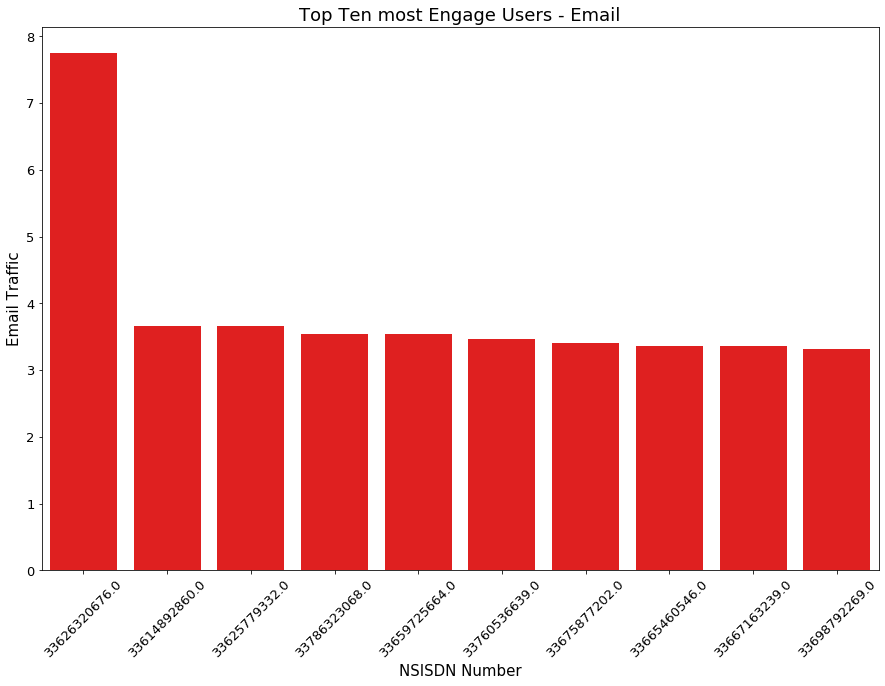

In [741]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_email_users, x='msisdn_number', y='email_traffic', color='r', 
            order=top10_email_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Email", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Email Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenEmail.png", format="png")
plt.show()

In [742]:
email_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=google_users.head(10))

In [743]:
email_agg

,msisdn_number,metrics,value
0,33626320676.0,session_dur_hours,11.0000
1,33625779332.0,session_dur_hours,17.0000
2,33614892860.0,session_dur_hours,8.0000
3,33760536639.0,session_dur_hours,9.0000
4,33659725664.0,session_dur_hours,16.0000
5,33786323068.0,session_dur_hours,23.0000
6,33675877202.0,session_dur_hours,7.0000
7,33667163239.0,session_dur_hours,5.0000
8,33761268199.0,session_dur_hours,7.0000
9,33698756430.0,session_dur_hours,20.0000


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten email users enagagement, I wil log(normalise) the value figures

In [744]:
email_agg.value = np.log(email_agg.value)

In [745]:
email_agg = email_agg.sort_values(by='msisdn_number')

In [746]:
email_agg.rename(columns={'value':'value(log)'}, inplace=True)

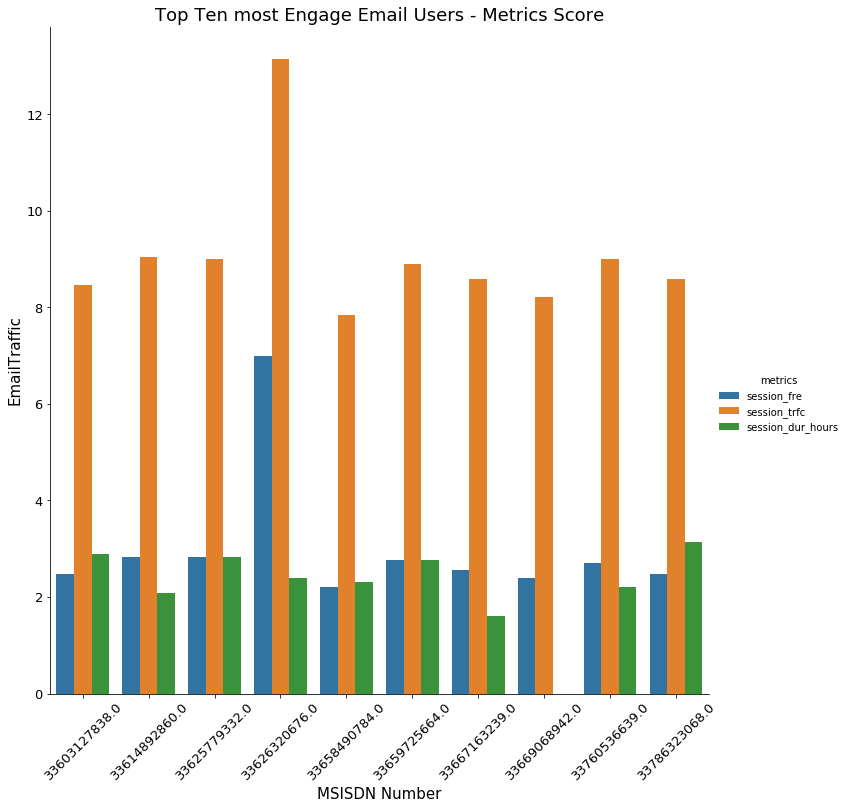

In [747]:
sns.catplot(data=social_media_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Email Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('EmailTraffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenEmail2.png", format="png")
plt.show()

- #### Interpretation

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

> Youtube

In [748]:
youtube_users = apps.groupby('msisdn_number')['youtube(mb)'].sum().reset_index(name='youtube_traffic')

In [749]:
youtube_users

,msisdn_number,youtube_traffic
0,3197020876596.0,11.4059
1,33601001722.0,20.6228
2,33601001754.0,11.8563
3,33601002511.0,20.3453
4,33601007832.0,6.6541
...,...,...
106851,33789967113.0,26.9189
106852,33789980299.0,36.2519
106853,33789996170.0,25.4134
106854,33789997247.0,18.9319


> merge aggregation metrics

In [750]:
youtube_users = youtube_users.merge(agg_metrics, on='msisdn_number').sort_values(by='youtube_traffic', ascending=False)

In [751]:
youtube_users.head(10)

,msisdn_number,youtube_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,23570.2609,11,1084,514713.1696
13181,33625779332.0,431.9752,17,17,8105.8700
92925,33760536639.0,377.9309,9,15,8120.3212
6438,33614892860.0,376.1006,8,17,8436.4190
76364,33675877202.0,302.7063,7,15,7525.5495
65119,33667163239.0,300.6281,5,13,5358.1181
13995,33627080969.0,294.4857,10,12,5488.1390
92579,33760413819.0,289.1245,14,12,6801.9586
86456,33698792269.0,288.6410,19,11,6237.8875
667,33603127838.0,270.9294,18,12,4745.6694


In [752]:
top10_youtube_users = youtube_users.head(10)

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten youtube users, I wil log(normalise) the youtube traffic

In [753]:
top10_youtube_users.youtube_traffic = np.log(top10_youtube_users.youtube_traffic)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [754]:
top10_youtube_users

,msisdn_number,youtube_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,10.067741,11,1084,514713.1696
13181,33625779332.0,6.068368,17,17,8105.8700
92925,33760536639.0,5.934711,9,15,8120.3212
6438,33614892860.0,5.929857,8,17,8436.4190
76364,33675877202.0,5.712763,7,15,7525.5495
65119,33667163239.0,5.705874,5,13,5358.1181
13995,33627080969.0,5.685230,10,12,5488.1390
92579,33760413819.0,5.666857,14,12,6801.9586
86456,33698792269.0,5.665184,19,11,6237.8875
667,33603127838.0,5.601858,18,12,4745.6694


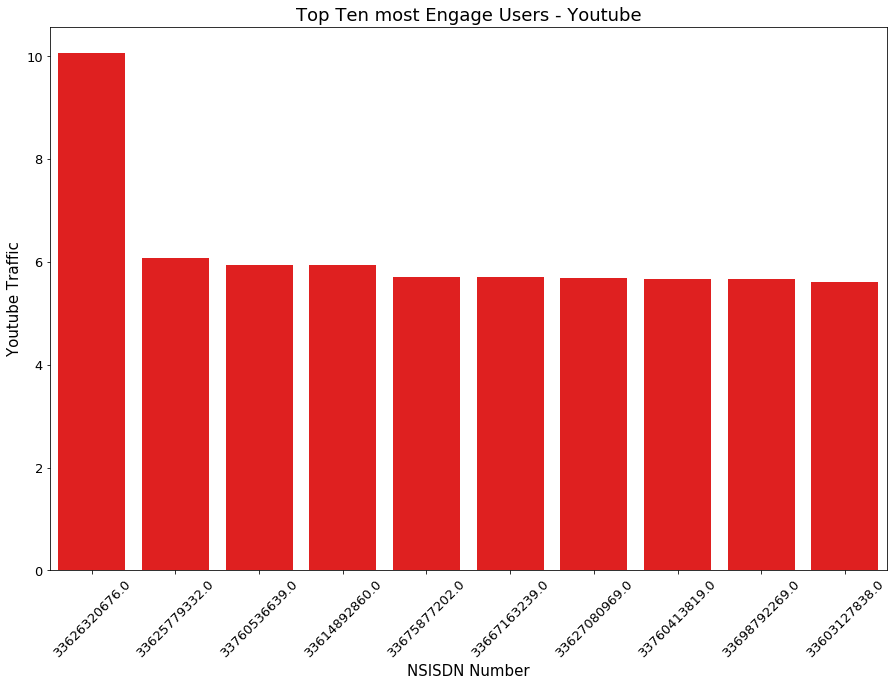

In [755]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_youtube_users, x='msisdn_number', y='youtube_traffic', color='r', 
            order=top10_youtube_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Youtube", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Youtube Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenYoutube.png", format="png")
plt.show()

In [756]:
youtube_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=youtube_users.head(10))

In [757]:
youtube_agg

,msisdn_number,metrics,value
0,33626320676.0,session_dur_hours,11.0000
1,33625779332.0,session_dur_hours,17.0000
2,33760536639.0,session_dur_hours,9.0000
3,33614892860.0,session_dur_hours,8.0000
4,33675877202.0,session_dur_hours,7.0000
5,33667163239.0,session_dur_hours,5.0000
6,33627080969.0,session_dur_hours,10.0000
7,33760413819.0,session_dur_hours,14.0000
8,33698792269.0,session_dur_hours,19.0000
9,33603127838.0,session_dur_hours,18.0000


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten youtube users enagagement, I wil log(normalise) the value figures

In [758]:
youtube_agg.value = np.log(youtube_agg.value)

In [759]:
youtube_agg = youtube_agg.sort_values(by='msisdn_number')

In [760]:
youtube_agg.rename(columns={'value':'value(log)'}, inplace=True)

In [761]:
youtube_agg

,msisdn_number,metrics,value(log)
29,33603127838.0,session_trfc,8.464988
19,33603127838.0,session_fre,2.484907
9,33603127838.0,session_dur_hours,2.890372
23,33614892860.0,session_trfc,9.040313
3,33614892860.0,session_dur_hours,2.079442
13,33614892860.0,session_fre,2.833213
1,33625779332.0,session_dur_hours,2.833213
21,33625779332.0,session_trfc,9.000344
11,33625779332.0,session_fre,2.833213
20,33626320676.0,session_trfc,13.151365


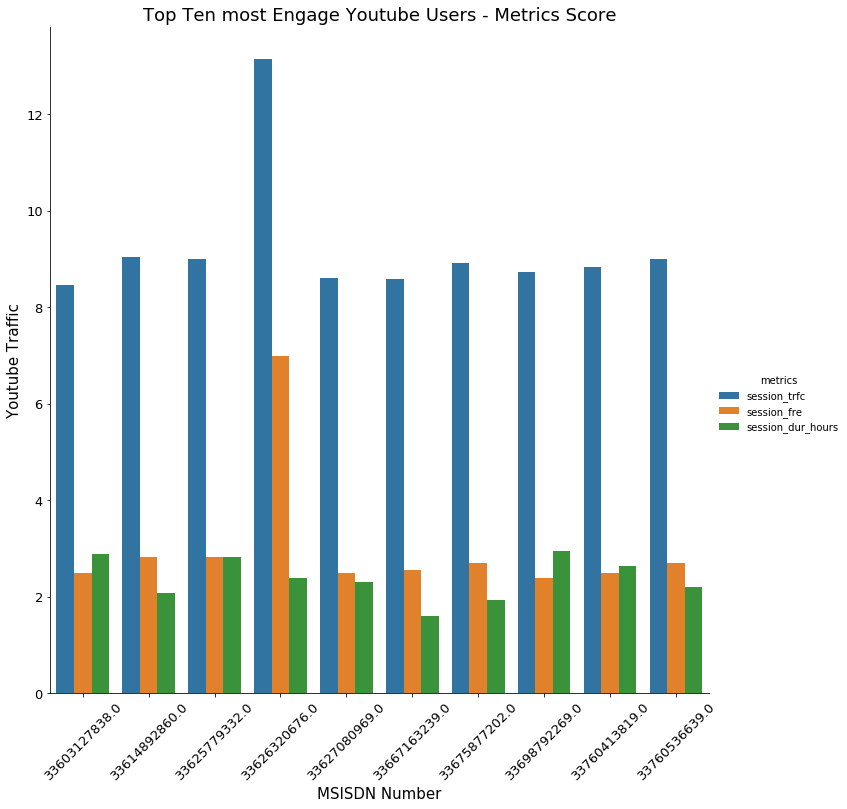

In [762]:
sns.catplot(data=youtube_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Youtube Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Youtube Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenYoutube2.png", format="png")
plt.show()

- #### Interpretation

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

> Netflix

In [763]:
netflix_users = apps.groupby('msisdn_number')['netflix(mb)'].sum().reset_index(name='netflix_traffic')

In [764]:
netflix_users

,msisdn_number,netflix_traffic
0,3197020876596.0,25.3604
1,33601001722.0,25.9218
2,33601001754.0,10.7019
3,33601002511.0,18.4573
4,33601007832.0,1.8521
...,...,...
106851,33789967113.0,28.9634
106852,33789980299.0,49.5437
106853,33789996170.0,14.2122
106854,33789997247.0,8.1359


> merge aggregation metrics

In [765]:
netflix_users = netflix_users.merge(agg_metrics, on='msisdn_number').sort_values(by='netflix_traffic', ascending=False)

In [766]:
netflix_users.head(10)

,msisdn_number,netflix_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,23443.5058,11,1084,514713.1696
37053,33659725664.0,381.0111,16,16,7348.8834
6438,33614892860.0,344.6591,8,17,8436.4190
13181,33625779332.0,340.4432,17,17,8105.8700
92925,33760536639.0,319.1408,9,15,8120.3212
92579,33760413819.0,303.5999,14,12,6801.9586
65119,33667163239.0,299.3962,5,13,5358.1181
76364,33675877202.0,294.7742,7,15,7525.5495
106139,33786323068.0,291.7669,23,12,5361.7778
94656,33761268199.0,278.5600,7,10,4817.1181


In [767]:
top10_netflix_users = netflix_users.head(10)

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten netflix users, I wil log(normalise) the netflix traffic

In [768]:
top10_netflix_users.netflix_traffic = np.log(top10_netflix_users.netflix_traffic)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [769]:
top10_netflix_users

,msisdn_number,netflix_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,10.062349,11,1084,514713.1696
37053,33659725664.0,5.942829,16,16,7348.8834
6438,33614892860.0,5.842556,8,17,8436.4190
13181,33625779332.0,5.830248,17,17,8105.8700
92925,33760536639.0,5.765632,9,15,8120.3212
92579,33760413819.0,5.715711,14,12,6801.9586
65119,33667163239.0,5.701768,5,13,5358.1181
76364,33675877202.0,5.686210,7,15,7525.5495
106139,33786323068.0,5.675955,23,12,5361.7778
94656,33761268199.0,5.629633,7,10,4817.1181


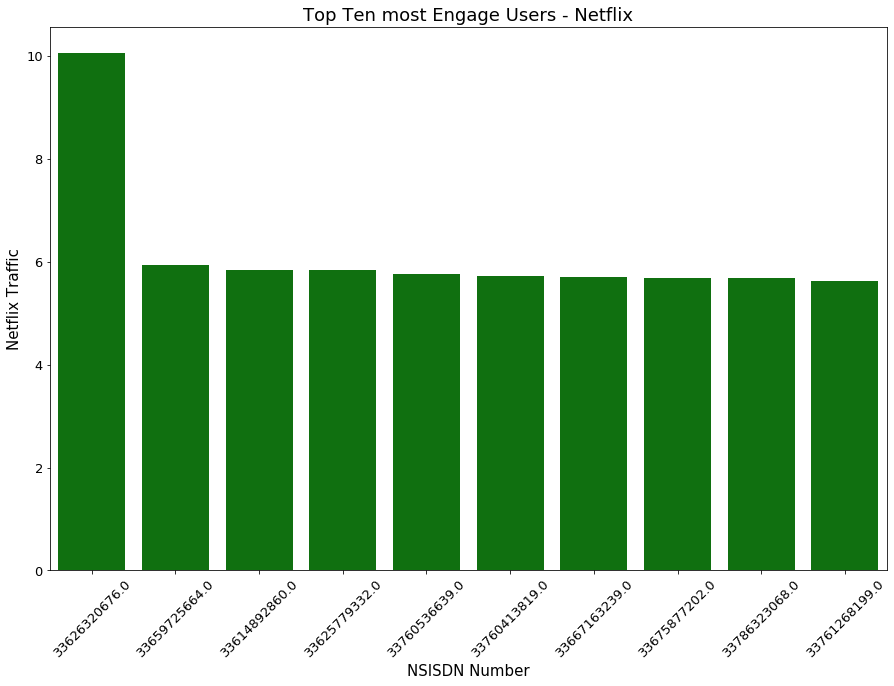

In [770]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_netflix_users, x='msisdn_number', y='netflix_traffic', color='g', 
            order=top10_netflix_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Netflix", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('NSISDN Number', fontsize=15)
plt.ylabel('Netflix Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenNetflix.png", format="png")
plt.show()

In [771]:
netflix_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=netflix_users.head(10))

In [772]:
netflix_users

,msisdn_number,netflix_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,10.062349,11,1084,514713.1696
37053,33659725664.0,5.942829,16,16,7348.8834
6438,33614892860.0,5.842556,8,17,8436.4190
13181,33625779332.0,5.830248,17,17,8105.8700
92925,33760536639.0,5.765632,9,15,8120.3212
...,...,...,...,...,...
85473,33698486515.0,0.271000,23,1,436.9229
85617,33698533842.0,0.248200,23,1,597.9316
66130,33667489726.0,0.237100,16,1,73.2733
7070,33615884686.0,0.192200,0,1,802.8124


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten netflix users enagagement, I wil log(normalise) the value figures

In [773]:
netflix_agg.value = np.log(netflix_agg.value)

In [774]:
netflix_agg = netflix_agg.sort_values(by='msisdn_number')

In [775]:
netflix_agg.rename(columns={'value':'value(log)'}, inplace=True)

In [776]:
netflix_agg

,msisdn_number,metrics,value(log)
22,33614892860.0,session_trfc,9.040313
2,33614892860.0,session_dur_hours,2.079442
12,33614892860.0,session_fre,2.833213
3,33625779332.0,session_dur_hours,2.833213
23,33625779332.0,session_trfc,9.000344
13,33625779332.0,session_fre,2.833213
0,33626320676.0,session_dur_hours,2.397895
20,33626320676.0,session_trfc,13.151365
10,33626320676.0,session_fre,6.988413
11,33659725664.0,session_fre,2.772589


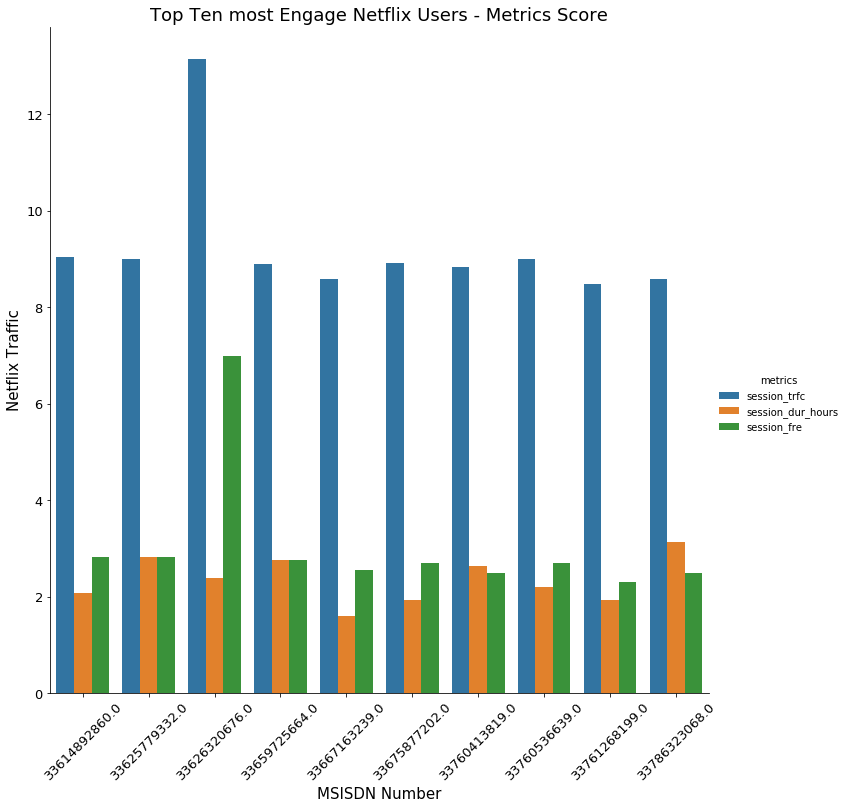

In [777]:
sns.catplot(data=netflix_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Netflix Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Netflix Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenNetflix2.png", format="png")
plt.show()

- #### Interpretation

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

> Gaming

In [778]:
gaming_users = apps.groupby('msisdn_number')['gaming(mb)'].sum().reset_index(name='gaming_traffic')

In [779]:
gaming_users

,msisdn_number,gaming_traffic
0,3197020876596.0,169.8005
1,33601001722.0,774.8210
2,33601001754.0,114.2026
3,33601002511.0,513.8662
4,33601007832.0,373.0069
...,...,...
106851,33789967113.0,128.5705
106852,33789980299.0,927.3005
106853,33789996170.0,629.7697
106854,33789997247.0,416.7588


> merge aggregation metrics

In [780]:
gaming_users = gaming_users.merge(agg_metrics, on='msisdn_number').sort_values(by='gaming_traffic', ascending=False)

In [781]:
gaming_users.head(10)

,msisdn_number,gaming_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,446668.2450,11,1084,514713.1696
6438,33614892860.0,7390.4345,8,17,8436.4190
92925,33760536639.0,7115.4073,9,15,8120.3212
13181,33625779332.0,6987.2604,17,17,8105.8700
76364,33675877202.0,6647.6512,7,15,7525.5495
37053,33659725664.0,6413.9930,16,16,7348.8834
63029,33666464084.0,6338.4088,12,11,6969.9296
92579,33760413819.0,5978.2213,14,12,6801.9586
57242,33664712899.0,5821.0907,21,11,6553.6673
86456,33698792269.0,5487.1970,19,11,6237.8875


In [782]:
top10_gaming_users = gaming_users.head(10)

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten gaming users, I wil log(normalise) the gaming traffic

In [783]:
top10_gaming_users.gaming_traffic = np.log(top10_gaming_users.gaming_traffic)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [784]:
top10_gaming_users

,msisdn_number,gaming_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,13.009571,11,1084,514713.1696
6438,33614892860.0,8.907942,8,17,8436.4190
92925,33760536639.0,8.870018,9,15,8120.3212
13181,33625779332.0,8.851844,17,17,8105.8700
76364,33675877202.0,8.802019,7,15,7525.5495
37053,33659725664.0,8.766237,16,16,7348.8834
63029,33666464084.0,8.754383,12,11,6969.9296
92579,33760413819.0,8.695878,14,12,6801.9586
57242,33664712899.0,8.669243,21,11,6553.6673
86456,33698792269.0,8.610173,19,11,6237.8875


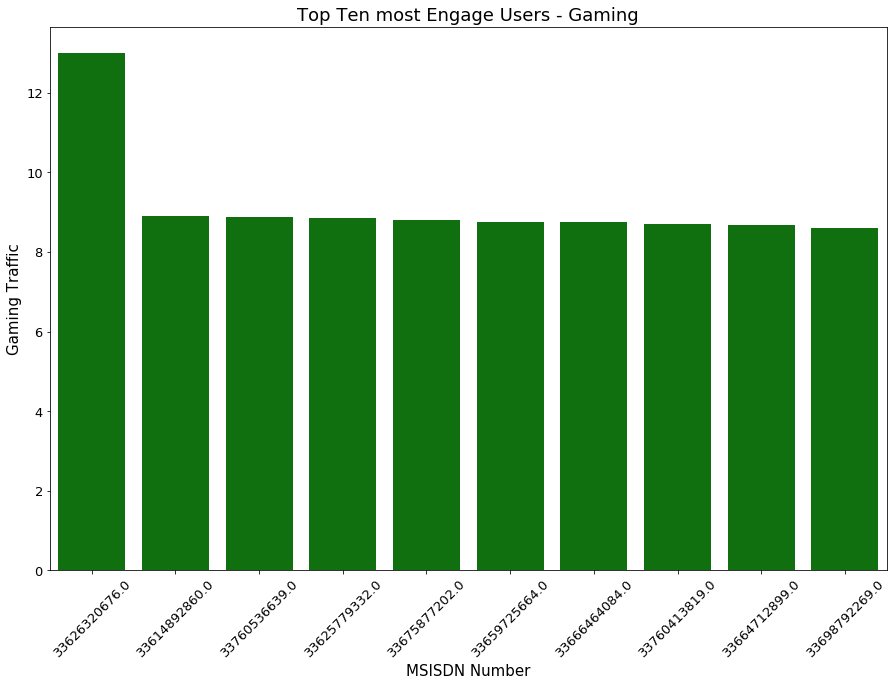

In [785]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_gaming_users, x='msisdn_number', y='gaming_traffic', color='g', 
            order=top10_gaming_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Gaming", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Gaming Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenGaming.png", format="png")
plt.show()

In [786]:
gaming_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=gaming_users.head(10))

In [787]:
gaming_agg

,msisdn_number,metrics,value
0,33626320676.0,session_dur_hours,11.0000
1,33614892860.0,session_dur_hours,8.0000
2,33760536639.0,session_dur_hours,9.0000
3,33625779332.0,session_dur_hours,17.0000
4,33675877202.0,session_dur_hours,7.0000
5,33659725664.0,session_dur_hours,16.0000
6,33666464084.0,session_dur_hours,12.0000
7,33760413819.0,session_dur_hours,14.0000
8,33664712899.0,session_dur_hours,21.0000
9,33698792269.0,session_dur_hours,19.0000


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten gaming users enagagement, I wil log(normalise) the value figures

In [788]:
gaming_agg.value = np.log(gaming_agg.value)

In [789]:
gaming_agg = gaming_agg.sort_values(by='msisdn_number')

In [790]:
gaming_agg.rename(columns={'value':'value(log)'}, inplace=True)

In [791]:
gaming_agg

,msisdn_number,metrics,value(log)
1,33614892860.0,session_dur_hours,2.079442
21,33614892860.0,session_trfc,9.040313
11,33614892860.0,session_fre,2.833213
23,33625779332.0,session_trfc,9.000344
13,33625779332.0,session_fre,2.833213
3,33625779332.0,session_dur_hours,2.833213
10,33626320676.0,session_fre,6.988413
20,33626320676.0,session_trfc,13.151365
0,33626320676.0,session_dur_hours,2.397895
5,33659725664.0,session_dur_hours,2.772589


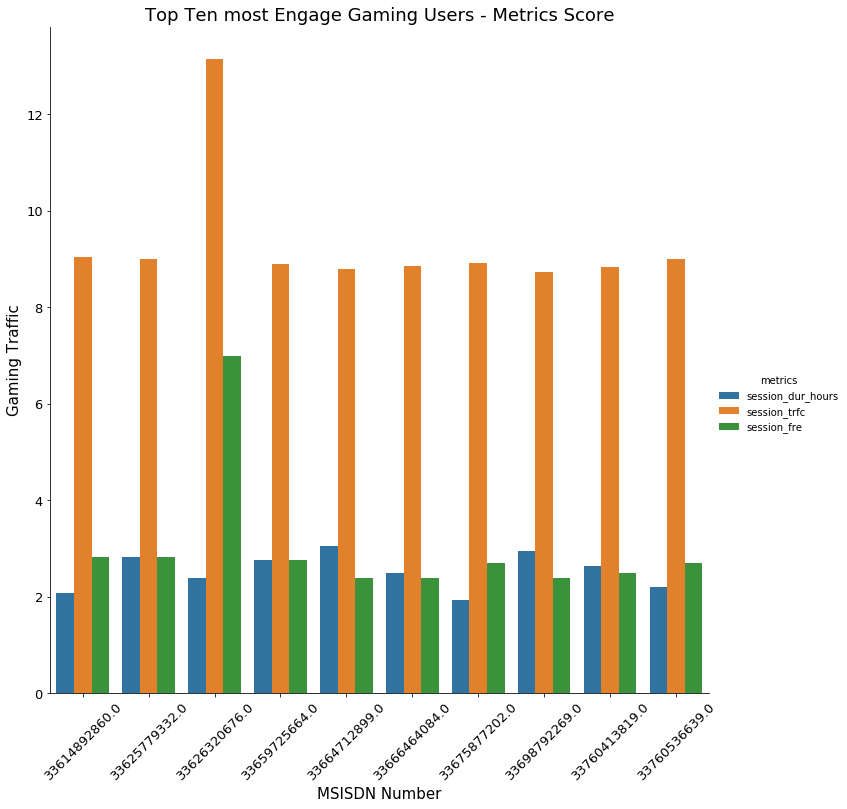

In [792]:
sns.catplot(data=gaming_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Gaming Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Gaming Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenGaming2.png", format="png")
plt.show()

- #### Interpretation

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

> Other Applications

In [793]:
other_users = apps.groupby('msisdn_number')['other(mb)'].sum().reset_index(name='other_traffic')

In [794]:
other_users

,msisdn_number,other_traffic
0,3197020876596.0,448.7290
1,33601001722.0,368.6627
2,33601001754.0,268.6597
3,33601002511.0,478.4524
4,33601007832.0,33.6453
...,...,...
106851,33789967113.0,389.2014
106852,33789980299.0,1025.3338
106853,33789996170.0,281.6036
106854,33789997247.0,201.3351


> merge aggregation metrics

In [795]:
other_users = other_users.merge(agg_metrics, on='msisdn_number').sort_values(by='other_traffic', ascending=False)

In [796]:
other_users.head(10)

,msisdn_number,other_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,437876.0044,11,1084,514713.1696
6438,33614892860.0,7285.3694,8,17,8436.4190
76364,33675877202.0,6483.5695,7,15,7525.5495
13181,33625779332.0,6060.2024,17,17,8105.8700
667,33603127838.0,6033.5836,18,12,4745.6694
37053,33659725664.0,6024.7567,16,16,7348.8834
13937,33626948251.0,5059.6694,22,10,4602.0874
13995,33627080969.0,4880.7055,10,12,5488.1390
94656,33761268199.0,4842.5479,7,10,4817.1181
30716,33658361927.0,4781.3902,16,10,6153.4861


In [797]:
top10_other_users = other_users.head(10)

> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten other aplication users, I wil log(normalise) the other applications traffic

In [798]:
top10_other_users.other_traffic = np.log(top10_other_users.other_traffic)

/home/patrick/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [799]:
top10_other_users

,msisdn_number,other_traffic,session_dur_hours,session_fre,session_trfc
13527,33626320676.0,12.989691,11,1084,514713.1696
6438,33614892860.0,8.893623,8,17,8436.4190
76364,33675877202.0,8.777026,7,15,7525.5495
13181,33625779332.0,8.709498,17,17,8105.8700
667,33603127838.0,8.705096,18,12,4745.6694
37053,33659725664.0,8.703632,16,16,7348.8834
13937,33626948251.0,8.529056,22,10,4602.0874
13995,33627080969.0,8.493045,10,12,5488.1390
94656,33761268199.0,8.485196,7,10,4817.1181
30716,33658361927.0,8.472487,16,10,6153.4861


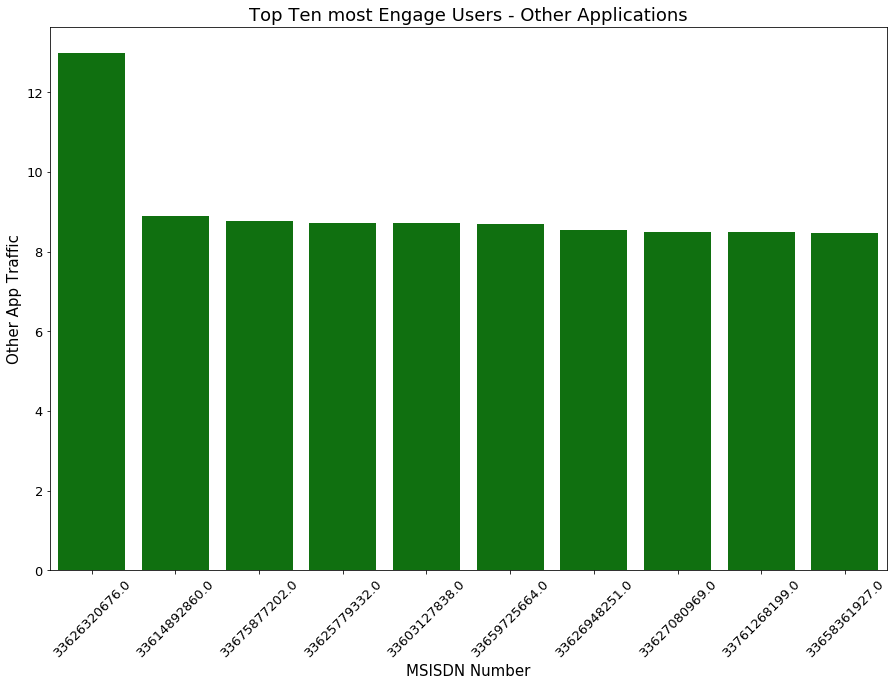

In [800]:
plt.subplots(figsize=(15,10))
sns.barplot(data=top10_other_users, x='msisdn_number', y='other_traffic', color='g', 
            order=top10_other_users.msisdn_number.values.tolist())
plt.title("Top Ten most Engage Users - Other Applications", fontsize=18)
plt.xticks(fontsize=13, rotation = 45) 
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Other App Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenOtherApp.png", format="png")
plt.show()

In [801]:
other_agg = pd.melt(id_vars=['msisdn_number'], value_vars=['session_dur_hours','session_fre','session_trfc'],
        value_name='value', var_name='metrics', frame=other_users.head(10))

In [802]:
other_agg

,msisdn_number,metrics,value
0,33626320676.0,session_dur_hours,11.0000
1,33614892860.0,session_dur_hours,8.0000
2,33675877202.0,session_dur_hours,7.0000
3,33625779332.0,session_dur_hours,17.0000
4,33603127838.0,session_dur_hours,18.0000
5,33659725664.0,session_dur_hours,16.0000
6,33626948251.0,session_dur_hours,22.0000
7,33627080969.0,session_dur_hours,10.0000
8,33761268199.0,session_dur_hours,7.0000
9,33658361927.0,session_dur_hours,16.0000


> Due to the presence of the outlier value, 

> in order for us to have a better view of the top ten other application users enagagement, I wil log(normalise) the value figures

In [803]:
other_agg.value = np.log(other_agg.value)

In [804]:
other_agg = other_agg.sort_values(by='msisdn_number')

In [805]:
other_agg.rename(columns={'value':'value(log)'}, inplace=True)

In [806]:
other_agg

,msisdn_number,metrics,value(log)
14,33603127838.0,session_fre,2.484907
24,33603127838.0,session_trfc,8.464988
4,33603127838.0,session_dur_hours,2.890372
1,33614892860.0,session_dur_hours,2.079442
21,33614892860.0,session_trfc,9.040313
11,33614892860.0,session_fre,2.833213
3,33625779332.0,session_dur_hours,2.833213
23,33625779332.0,session_trfc,9.000344
13,33625779332.0,session_fre,2.833213
20,33626320676.0,session_trfc,13.151365


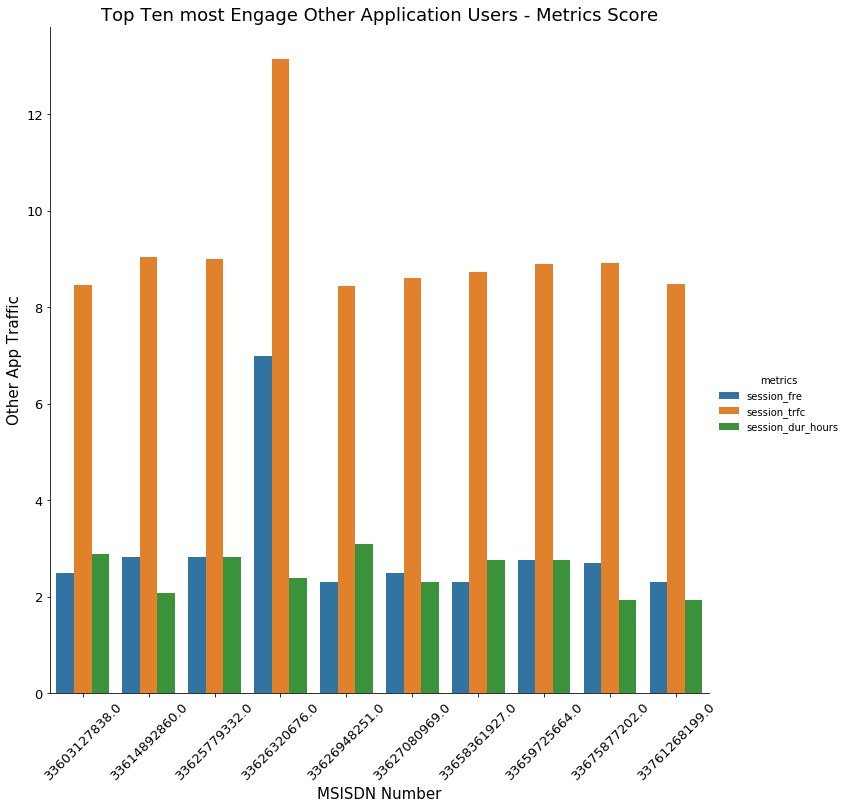

In [807]:
sns.catplot(data=other_agg, x='msisdn_number', y='value(log)', hue='metrics',
    height=10, kind='bar', 
    aspect=1,)
plt.title("Top Ten most Engage Other Application Users - Metrics Score", fontsize=18)
plt.xticks(fontsize=13, rotation = 45)
plt.yticks(fontsize=13)
plt.xlabel('MSISDN Number', fontsize=15)
plt.ylabel('Other App Traffic', fontsize=15)
plt.savefig("visuals/user_engagement/topTenOtherApp2.png", format="png")
plt.show()

- #### Interpretation

> From the above, we can observe that there is high session traffic in this application compared to other enagagement metric

#### B.
> Plot the top 3 most used applications

In [808]:
apps

,bearer_id,msisdn_number,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb),total_traffic(mb),duration (hrs)
0,13114483460844900352,33664962239.0,1.4974,2.7713,3.5298,17.5056,17.0280,278.8796,172.1943,329.6179,1739.1709
1,13114483482878900224,33681854413.0,1.8437,4.2096,0.8940,37.5358,33.9179,581.6658,516.8527,674.4245,1301.8650
2,13114483484080500736,33760627129.0,1.6463,9.7552,3.2073,32.8305,22.6509,219.3263,395.6874,293.4370,1298.6781
3,13114483485442799616,33750343200.0,0.6270,11.2646,1.9750,34.8423,14.3934,772.8461,726.5446,848.1529,1260.2898
4,13114483499480700928,33699795932.0,0.8705,7.3899,2.0126,32.6369,16.7273,506.6271,538.4634,579.5301,1038.5603
...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,33650688697.0,3.3541,12.1926,0.6589,26.6601,35.8218,510.9853,15.9759,602.5354,77.4677
149997,7349883264234609664,33663449963.0,2.2432,4.2108,2.0234,21.1387,38.7605,602.3675,681.5320,673.0880,93.4321
149998,13114483573367300096,33621890103.0,1.2019,6.2804,1.9629,23.3807,14.3334,540.6702,126.2813,598.6201,93.6981
149999,13114483573367300096,33619622058.0,0.7850,7.3979,2.7188,16.3293,15.7307,338.6178,778.3127,382.9212,93.3749


In [809]:
topApps = apps[['social_media(mb)','google(mb)','email(mb)','youtube(mb)','netflix(mb)','gaming(mb)','other(mb)']]

In [810]:
topApps

,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb)
0,1.4974,2.7713,3.5298,17.5056,17.0280,278.8796,172.1943
1,1.8437,4.2096,0.8940,37.5358,33.9179,581.6658,516.8527
2,1.6463,9.7552,3.2073,32.8305,22.6509,219.3263,395.6874
3,0.6270,11.2646,1.9750,34.8423,14.3934,772.8461,726.5446
4,0.8705,7.3899,2.0126,32.6369,16.7273,506.6271,538.4634
...,...,...,...,...,...,...,...
149996,3.3541,12.1926,0.6589,26.6601,35.8218,510.9853,15.9759
149997,2.2432,4.2108,2.0234,21.1387,38.7605,602.3675,681.5320
149998,1.2019,6.2804,1.9629,23.3807,14.3334,540.6702,126.2813
149999,0.7850,7.3979,2.7188,16.3293,15.7307,338.6178,778.3127


In [811]:
topAppsAgg = topApps.aggregate(['sum', 'mean'])

In [812]:
topAppsAgg

,social_media(mb),google(mb),email(mb),youtube(mb),netflix(mb),gaming(mb),other(mb)
sum,261535.036400,1.116850e+06,323169.322700,3.239198e+06,3.237070e+06,6.156005e+07,6.142161e+07
mean,1.743555,7.445616e+00,2.154448,2.159451e+01,2.158032e+01,4.103976e+02,4.094747e+02


> For efficient reporting, we would log normalise these values

In [813]:
topAppsAggLog = topAppsAgg.apply(lambda x: np.log(x))

In [814]:
topAppsAggLog=topAppsAggLog.transpose().sort_values(by=['sum', 'mean'], ascending=False).head(3)

In [815]:
topAppsAggLog

,sum,mean
gaming(mb),17.935524,6.017127
other(mb),17.933272,6.014875
youtube(mb),14.990836,3.072439


In [816]:
topAppsAggLog.rename(columns={'index':'apps'}, inplace=True)

In [817]:
topAppsAggLog

,sum,mean
gaming(mb),17.935524,6.017127
other(mb),17.933272,6.014875
youtube(mb),14.990836,3.072439


<Figure size 3600x4320 with 0 Axes>

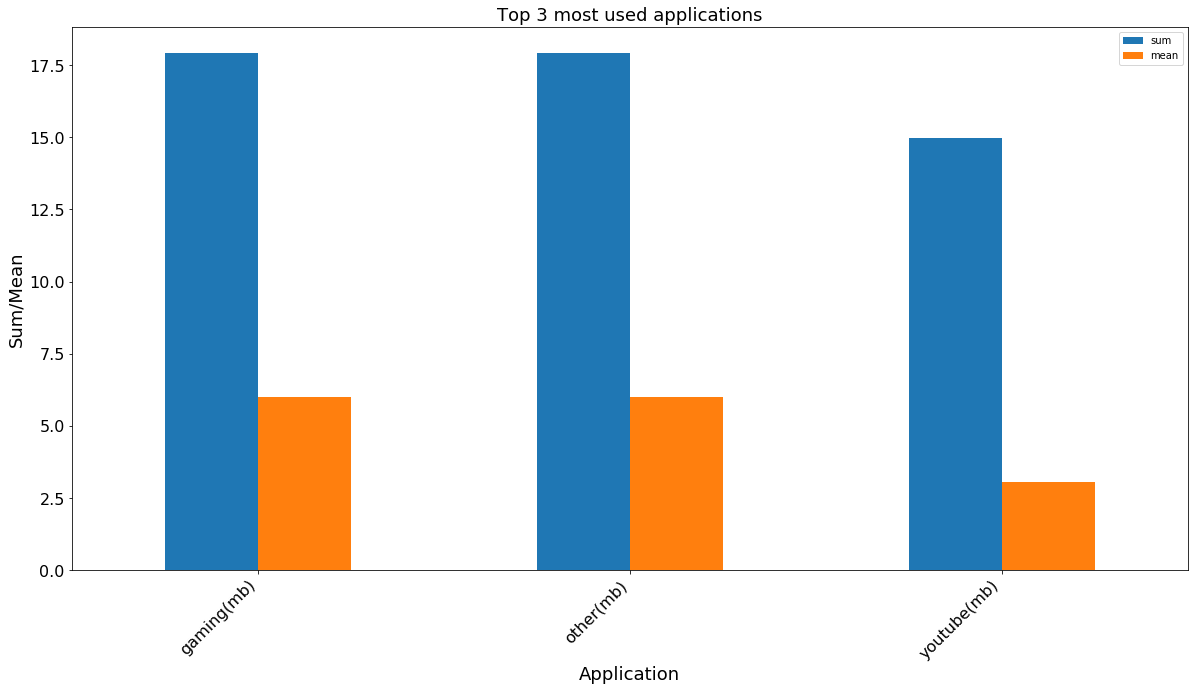

In [818]:
plt.figure(figsize=(50,60))
# topAppsAggLog.plot(figsize=(5,5));
ax= topAppsAggLog.plot.bar(figsize=(20,10))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0, 
    horizontalalignment='right'
)
plt.title("Top 3 most used applications", fontsize=18)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)
plt.xlabel('Application', fontsize=18)
plt.ylabel('Sum/Mean', fontsize=18)
plt.savefig("visuals/user_engagement/top3Apps.png", format="png")
plt.show()

##### Research Question 2

- Customer Classification

             
 1. K-Means Clustering 
 
      
        i  Normalize each engagement metric & run a k-means(k=3)
                  
            to classify customers in three groups of engagement.
                          
        ii  Compute the minimum, maximum, average & total non-normalized metrics for each cluster.                        
                          
             - Visual representaiton of result and textual interpretations
             
        iii Using ​k​-means clustering algorithm:
            
            group users in k-engagement clusters based on the engagement metrics



>  Normalize each engagement metric & run a k-means (k=3)  classify customers in three groups of engagement.

> Normalize the engagement metrics

In [819]:
data.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'imsi',
       'msisdn_number', 'imei', 'last_location_name', 'avg_rtt_dl__ms_',
       'avg_rtt_ul__ms_', 'avg_bearer_tp_dl__kbps_', 'avg_bearer_tp_ul__kbps_',
       'tcp_dl_retrans__vol__bytes_', 'tcp_ul_retrans__vol__bytes_',
       'dl_tp_<_50_kbps__%_', '50_kbps_<_dl_tp_<_250_kbps__%_',
       '250_kbps_<_dl_tp_<_1_mbps__%_', 'dl_tp_>_1_mbps__%_',
       'ul_tp_<_10_kbps__%_', '10_kbps_<_ul_tp_<_50_kbps__%_',
       '50_kbps_<_ul_tp_<_300_kbps__%_', 'ul_tp_>_300_kbps__%_',
       'http_dl__bytes_', 'http_ul__bytes_', 'activity_duration_dl__ms_',
       'activity_duration_ul__ms_', 'dur___ms__1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
       'nb_of

In [820]:
agg_metrics

,msisdn_number,session_dur_hours,session_fre,session_trfc
0,33626320676.0,11,1084,514713.1696
1,33625779332.0,17,17,8105.8700
2,33614892860.0,8,17,8436.4190
3,33760536639.0,9,15,8120.3212
4,33667163239.0,5,13,5358.1181
...,...,...,...,...
106851,33650431620.0,2,1,199.2166
106852,33698390293.0,2,1,797.9008
106853,33659328207.0,1,1,266.8424
106854,33665660120.0,1,1,647.0846


> Run k-means

In [821]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

> Normalise metrics - using MIn-Max Scaler...

Min-Max is recommended for clustering by researchers [here](https://www.researchgate.net/post/What_are_the_best_normalization_methods_Z-Score_Min-Max_etc_How_would_you_choose_a_data_normalization_method)

In [822]:
norm_metrics = agg_metrics[['session_dur_hours','session_fre','session_trfc']]

In [823]:
norm_metrics

,session_dur_hours,session_fre,session_trfc
0,11,1084,514713.1696
1,17,17,8105.8700
2,8,17,8436.4190
3,9,15,8120.3212
4,5,13,5358.1181
...,...,...,...
106851,2,1,199.2166
106852,2,1,797.9008
106853,1,1,266.8424
106854,1,1,647.0846


In [824]:
scaler = MinMaxScaler()

In [825]:
scaler.fit(norm_metrics)

MinMaxScaler()

In [826]:
scaled_metrics = scaler.transform(norm_metrics)

In [827]:
scaled_metrics

array([[4.78260870e-01, 1.00000000e+00, 1.00000000e+00],
       [7.39130435e-01, 1.47737765e-02, 1.56876863e-02],
       [3.47826087e-01, 1.47737765e-02, 1.63299263e-02],
       ...,
       [4.34782609e-02, 0.00000000e+00, 4.56852865e-04],
       [4.34782609e-02, 0.00000000e+00, 1.19564419e-03],
       [4.34782609e-02, 0.00000000e+00, 9.72953056e-04]])

> Verify minimum & maximum value of all features

In [828]:
scaled_metrics.min()

0.0

In [829]:
scaled_metrics.max()

1.0

In [830]:
km.fit(scaled_metrics)

KMeans(n_clusters=3)

> centroid values 

In [831]:
metrics_cluster = km.cluster_centers_
metrics_cluster

array([[5.12558328e-01, 3.77178785e-04, 1.23192927e-03],
       [9.24302002e-01, 4.25217664e-04, 1.28055980e-03],
       [1.41447027e-01, 3.19294651e-04, 1.17446352e-03]])

> Labels

>> assign labels to users

In [832]:
set(km.labels_.tolist())

{0, 1, 2}

In [833]:
norm_metrics['labels'] = km.labels_

In [834]:
norm_metrics

,session_dur_hours,session_fre,session_trfc,labels
0,11,1084,514713.1696,0
1,17,17,8105.8700,1
2,8,17,8436.4190,0
3,9,15,8120.3212,0
4,5,13,5358.1181,2
...,...,...,...,...
106851,2,1,199.2166,2
106852,2,1,797.9008,2
106853,1,1,266.8424,2
106854,1,1,647.0846,2


> Visually plot the clusters

>  ii  Compute the minimum, maximum, average & total non-normalized metrics for each cluster.                        

         - Visual representaiton of result and textual interpretations

#### Label 0

In [854]:
label_0 = norm_metrics.query("labels == 0").drop(columns='labels')

In [859]:
label0_stats = label_0.aggregate(['sum', 'min', 'max', 'mean'])

In [860]:
label0_stats

,session_dur_hours,session_fre,session_trfc
sum,381817.000000,45618.000000,2.156263e+07
min,8.000000,1.000000,3.170870e+01
max,16.000000,1084.000000,5.147132e+05
mean,11.788842,1.408485,6.657599e+02


#### Label 1

In [861]:
label_1 = norm_metrics.query("labels == 1").drop(columns='labels')

In [862]:
label1_stats = label_1.aggregate(['sum', 'min', 'max', 'mean'])

In [863]:
label1_stats

,session_dur_hours,session_fre,session_trfc
sum,771721.000000,53018.000000,2.507633e+07
min,17.000000,1.000000,3.202040e+01
max,23.000000,17.000000,8.105870e+03
mean,21.258946,1.460511,6.907891e+02


#### Label 2

In [864]:
label_2 = norm_metrics.query("labels == 2").drop(columns='labels') 

In [865]:
label2_stats = label_2.aggregate(['sum', 'min', 'max', 'mean'])

In [868]:
label2_stats

,session_dur_hours,session_fre,session_trfc
sum,124168.000000,51365.000000,2.428121e+07
min,0.000000,1.000000,3.242460e+01
max,7.000000,15.000000,7.525550e+03
mean,3.253282,1.345796,6.361833e+02


> Visualize these labels

> To do this we would melt the table of each clusters..